# Bước 1: Chuẩn bị dữ liệu

In [1148]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

from datetime import datetime
import math

In [1149]:
import warnings as wn
wn.filterwarnings('ignore')

In [1150]:
# Đọc dữ liệu đầu vào
customer_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final group test\Project 1\Prj01\dataset\drive-download-20220617T130000Z-001\customers_dataset.csv')
order_item_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final group test\Project 1\Prj01\dataset\drive-download-20220617T130000Z-001\order_items_dataset.csv')
order_payments_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final group test\Project 1\Prj01\dataset\drive-download-20220617T130000Z-001\order_payments_dataset.csv')
order_reviews_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final group test\Project 1\Prj01\dataset\drive-download-20220617T130000Z-001\order_reviews_dataset.csv')
orders_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final group test\Project 1\Prj01\dataset\drive-download-20220617T130000Z-001\orders_dataset.csv')
product_category_name_trans_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final group test\Project 1\Prj01\dataset\drive-download-20220617T130000Z-001\product_category_name_translation.csv')
products_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final group test\Project 1\Prj01\dataset\drive-download-20220617T130000Z-001\products_dataset.csv')

# Bước 2: Tìm hiểu dữ liệu

Tìm hiểu ý nghĩa từng bảng dữ liệu

## 1. Customers dataset dataset: Cung cấp thông tin về khách hàng.
+ customer_id: unique ID của khách hàng. Trường này dùng để link với trường customer_id ở bảng orders_dataset.
+ customer_unique_id: mã unique ID của khách hàng trong hệ thống quản lý thông tin khách hàng
+ customer_zip_code_prefix: zip code của khách hàng
+ customer_city: thành phố nơi khách hàng sống
+ customer_state: bang nơi khách hàng sống


In [1151]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1152]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [1153]:
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [1154]:
customer_df['customer_id'].duplicated().sum()

0

In [1155]:
count_customer_city = pd.pivot_table(data=customer_df,index='customer_city',
                                                    values='customer_id',aggfunc='count',fill_value=0).reset_index()
count_customer_city.sort_values(by='customer_id',ascending=False).head(10)

,customer_city,customer_id
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


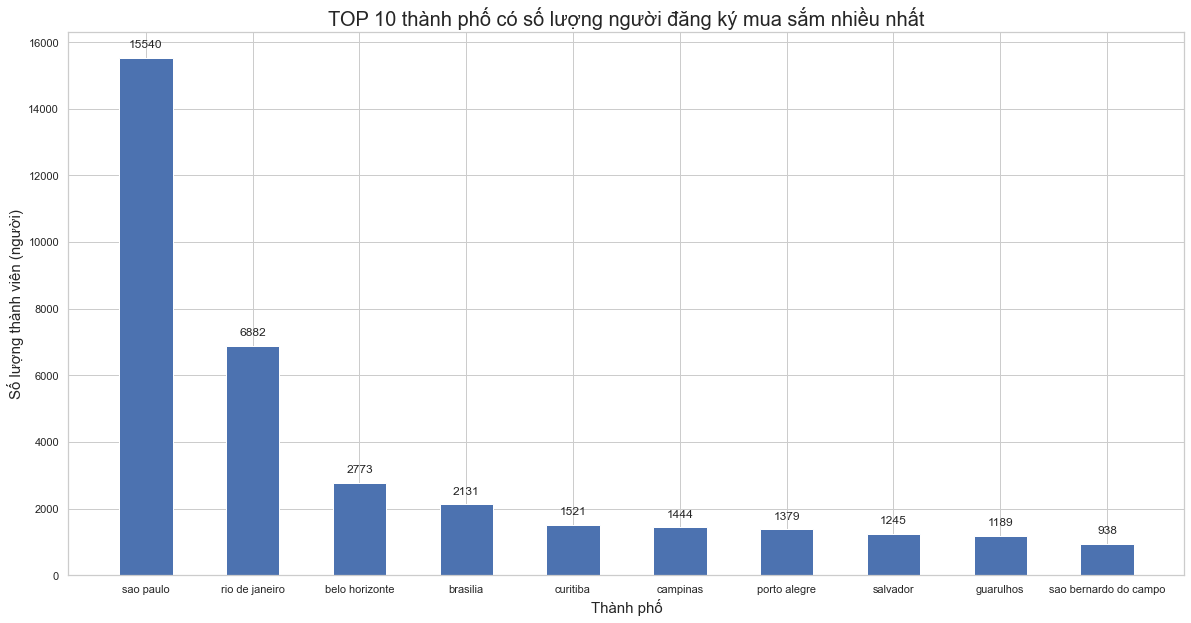

In [1156]:
xs = count_customer_city.sort_values(by='customer_id',ascending=False).head(10)['customer_city']
ys = count_customer_city.sort_values(by='customer_id',ascending=False).head(10)['customer_id'].values
labels = count_customer_city.sort_values(by='customer_id',ascending=False).head(10)['customer_city']

plt.figure(figsize=(20,10))
plt.bar(xs,ys,width=0.5)
plt.title('TOP 10 thành phố có số lượng người đăng ký mua sắm nhiều nhất',fontsize=20)
plt.xlabel('Thành phố',fontsize=15)
plt.ylabel('Số lượng thành viên (người)',fontsize=15)

for x,y in zip(xs,ys):

        label = "{:.0f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

plt.show();

In [1157]:
count_customer_state = pd.pivot_table(data=customer_df,index='customer_state',
                                                    values='customer_id',aggfunc='count',fill_value=0).reset_index()
top_10 = count_customer_state.sort_values(by='customer_id',ascending=False).head(10)
top_10.reset_index().drop(columns=['index'])

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


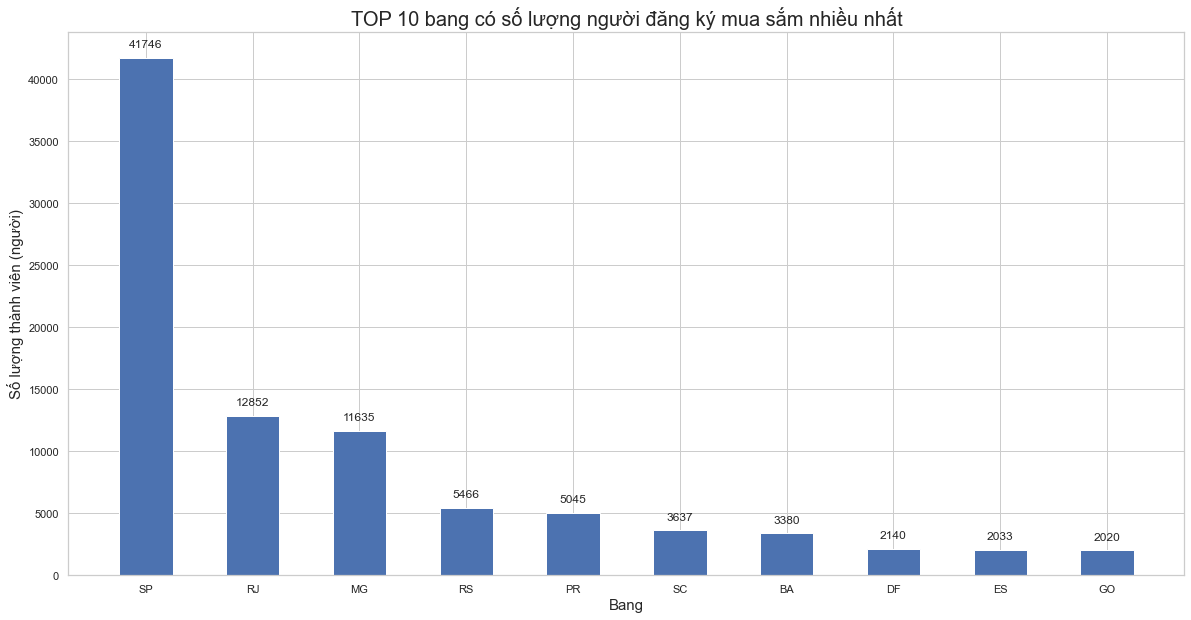

In [1158]:
xs = top_10['customer_state']
ys = top_10['customer_id'].values
labels = top_10['customer_state']

plt.figure(figsize=(20,10))
plt.bar(xs,ys,width=0.5)
plt.title('TOP 10 bang có số lượng người đăng ký mua sắm nhiều nhất',fontsize=20)
plt.xlabel('Bang',fontsize=15)
plt.ylabel('Số lượng thành viên (người)',fontsize=15)

for x,y in zip(xs,ys):

        label = "{:.0f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

plt.show();



## 2. Order items dataset: Cung cấp thông tin về từng món hàng trong đơn hàng và chi phí ship
+ order_id: unique ID của đơn hàng
+ order_item_id: ID của món hàng trong đơn hàng (món hàng số 1 có ID là 1, món hàng số 2 có ID là 2, v.v. Dựa vào đây ta cũng biết được mỗi đơn hàng có bao nhiêu món hàng)
+ product_id: unique ID của sản phẩm nằm trong đơn hàng
+ seller_id: unique ID của người bán hàng
+ price: giá của món hàng
+ freight_value: phí ship


In [1159]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [1160]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [1161]:
order_item_df.isnull().sum()

order_id         0
order_item_id    0
product_id       0
seller_id        0
price            0
freight_value    0
dtype: int64

In [1162]:
order_item_df['order_id'].duplicated().sum()

13984

In [1163]:
order_item_df['order_id'].value_counts().head(10)

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
9bdc4d4c71aa1de4606060929dee888c    14
73c8ab38f07dc94389065f7eba4f297a    14
37ee401157a3a0b28c9c6d0ed8c3b24b    13
2c2a19b5703863c908512d135aa6accc    12
c05d6a79e55da72ca780ce90364abed9    12
Name: order_id, dtype: int64

In [1164]:
order_item_df.loc[order_item_df['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,7.8,6.57
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.2,7.89


In [1165]:
order_item_df.loc[order_item_df['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']['product_id'].value_counts()

05b515fdc76e888aada3c6d66c201dff    10
270516a3f41dc035aa87d220228f844c    10
79ce45dbc2ea29b22b5a261bbb7b7ee7     1
Name: product_id, dtype: int64

In [1166]:
order_item_df.duplicated(subset='order_id').sum()

13984

=> Sự trùng lặp này nhiều là do đây là tập dữ liệu các đơn order diễn ra, mỗi bản ghi chỉ chứ 1 sản phẩm, nếu 1 đơn order có 3 sản phẩm thì sự trùng lặp sẽ được tính.

In [1167]:
# Kiểm tra các dữ liệu trùng lặp
order_item_df.loc[order_item_df.duplicated(subset='order_id')].head(20)

,order_id,order_item_id,product_id,seller_id,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,18.99,7.78
76,002c9def9c9b951b1bec6d50753c9891,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,78.00,8.90
81,002f98c0f7efd42638ed6100ca699b42,2,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,8.99,32.57
88,003324c70b19a16798817b2b3640e721,2,2b939dc9b176d7fa21594d588815d4a4,dbc22125167c298ef99da25668e1011f,102.90,14.45
92,00337fe25a3780b3424d9ad7c5a4b35e,2,13944d17b257432717fd260e69853140,cfb1a033743668a192316f3c6d1d2671,59.90,9.94


In [1168]:
# Kiểm tra thử 1 order_id với 3 dòng bản ghi với 1 đơn order có số lượng sản phẩm là 3 (cùng mẫu)
order_item_df.loc[order_item_df['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,21.33,15.1


In [1169]:
# Thử với 1 order_id khác, ta thấy chi phí ship là tương tự nhau
order_item_df.loc[order_item_df['order_id'] == '001ab0a7578dd66cd4b0a71f5b6e1e41']

,order_id,order_item_id,product_id,seller_id,price,freight_value
42,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63


In [1170]:
# Tương tự là 1 order_id khác.
order_item_df.loc[order_item_df['order_id'] == '00526a9d4ebde463baee25f386963ddc']

,order_id,order_item_id,product_id,seller_id,price,freight_value
137,00526a9d4ebde463baee25f386963ddc,1,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,33.89,8.4
138,00526a9d4ebde463baee25f386963ddc,2,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,33.89,8.4
139,00526a9d4ebde463baee25f386963ddc,3,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,33.89,8.4
140,00526a9d4ebde463baee25f386963ddc,4,0c4a0f8ab44f9acd2d04e7024f9ba362,7210cd29727d674c00741e5e387b3ccd,33.89,8.4


Các dòng kiểm tra dữ liệu ở trên là ngẫu nhiên nhưng ta thấy rằng, 1 order_id thường sẽ mua cùng 1 sản phẩm nhưng với số lượng khác nhau mà chưa xuất hiện nhiều sản phẩm khác nhau trong 1 đơn order_id

In [1171]:
# Kiểm tra sự trùng lặp của nếu thêm yếu tố product_id
order_item_df.duplicated(subset=['order_id','product_id']).sum()

10225

Ta thấy rằng, có tất cả 10225 sự trùng lắp chứng tỏ, có 10225 đơn order có chỉ đặt 1 sản phẩm nhưng số lượng >=2

In [1172]:
# Kiểm tra sự trùng lắp gồm 2 yếu tố order_id và product_id
order_item_df.loc[order_item_df.duplicated(subset=['order_id','product_id'])].tail(10)

,order_id,order_item_id,product_id,seller_id,price,freight_value
112575,ffd6f465cab015b452d398ac1f5d978a,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,7.84,22.06
112576,ffd6f465cab015b452d398ac1f5d978a,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,7.84,22.06
112580,ffd84ab39cd5e873d8dba24342e65c01,2,fcf50ee5ad1f1a48671052487d2b0bff,0be8ff43f22e456b4e0371b2245e4d01,24.90,7.78
112604,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,19.00,15.79
112616,ffecd5a79a0084f6a592288c67e3c298,2,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,21.90,15.79
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19


In [1173]:
# Kiểm tra 1 đơn order_id với cùng 1 sản phẩm nhưng số lượng >=2
order_item_df.loc[order_item_df['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,order_item_id,product_id,seller_id,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19


In [1174]:
# Kiểm tra số lượng các đơn order không trùng lắp 2 yếu tố order_id và product_id
order_item_df[order_item_df.duplicated(subset=['order_id','product_id']) == False].shape

(102425, 6)

=> Ta có 102425 là các đơn không cùng 1 sản phẩm và số lượng >=2

In [1175]:
# Xếp hạng các đơn order có số lượng sản phẩm khác nhau nhiều nhất
order_item_df[order_item_df.duplicated(subset=['order_id','product_id']) == False].sort_values(by='order_item_id',ascending=False).reset_index().head()

,index,order_id,order_item_id,product_id,seller_id,price,freight_value
0,89016,ca3625898fbd48669d50701aba51cd5f,10,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,63.70,0.15
1,57305,8272b63d03f5f79c56e9e4120aec44ef,9,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,7.80,6.57
2,39686,5a3b1c29a49756e75f1ef513383c0c12,8,99444c1e11fc38755dae86f5c67d3d1a,d2374cbcbb3ca4ab1086534108cc3ab7,49.99,7.10
3,89014,ca3625898fbd48669d50701aba51cd5f,8,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,33.90,1.84
4,43761,637617b3ffe9e2f7a2411243829226d0,7,e11092e9722d1b6f8c18cd8947a1daff,1f50f920176fa81dab994f9023523100,79.90,24.01


In [1176]:
# Kiểm tra thử với 1 đơn order_id từ bảng trên
order_item_df.loc[order_item_df['order_id'] == 'ca3625898fbd48669d50701aba51cd5f']

,order_id,order_item_id,product_id,seller_id,price,freight_value
89007,ca3625898fbd48669d50701aba51cd5f,1,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,95.9,0.15
89008,ca3625898fbd48669d50701aba51cd5f,2,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,56.0,3.68
89009,ca3625898fbd48669d50701aba51cd5f,3,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,159.0,3.67
89010,ca3625898fbd48669d50701aba51cd5f,4,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,109.9,0.15
89011,ca3625898fbd48669d50701aba51cd5f,5,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,159.0,3.67
89012,ca3625898fbd48669d50701aba51cd5f,6,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,95.9,0.15
89013,ca3625898fbd48669d50701aba51cd5f,7,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,309.0,1.84
89014,ca3625898fbd48669d50701aba51cd5f,8,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,33.9,1.84
89015,ca3625898fbd48669d50701aba51cd5f,9,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,56.0,3.68
89016,ca3625898fbd48669d50701aba51cd5f,10,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,63.7,0.15


=>>> Ta kết luận rằng:
* 1 đơn order có thể cùng 1 sản phẩm và số lượng sản phẩm khác nhau
* 1 đơn order có thể nhiều sản phẩm khác nhau và số lượng cũng khác nhau
* 1 đơn order có nhiều sản phẩm và chi phí ship của các sản phẩm đó cũng khác nhau

## 3. Order payments dataset: Cung cấp thông tin về thanh toán của mỗi đơn hàng. Lưu ý là phải cộng tổng tất cả các khoản thanh toán của mỗi đơn hàng lại thì mới ra được giá trị của đơn hàng đó.
+ order_id: unique ID của đơn hàng
+ payment_sequential: thứ tự của thanh toán
+ payment_type: hình thức thanh toán
+ payment_installments: thanh toán 1 lần (payment_installments = 1) hay trả góp (payment_installments > 1, khi đó số tiền thanh toán sẽ được trả dần thành nhiều lần. Tổng giá trị của các lần thanh toán đó bằng payment_value)
+ payment_value: giá trị của thanh toán


In [1177]:
# Xuất dữ liệu
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1178]:
order_payments_df['order_id'].duplicated().sum()

4446

In [1179]:
order_payments_df['order_id'].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [1180]:
order_payments_df.loc[order_payments_df['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352'].sort_values(by='payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
65641,fa65dad1b0e818e3ccc5cb0e39231352,3,voucher,1,2.95
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
82593,fa65dad1b0e818e3ccc5cb0e39231352,7,voucher,1,0.32
68853,fa65dad1b0e818e3ccc5cb0e39231352,8,voucher,1,26.02
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86


In [1181]:
# Đếm số lượng các payment_sequential
order_payments_df['payment_sequential'].value_counts().head()

1    99360
2     3039
3      581
4      278
5      170
Name: payment_sequential, dtype: int64

In [1182]:
# Kiểm tra các bản ghi có payment_sequential = 5
order_payments_df.loc[order_payments_df['payment_sequential'] == 5].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
181,591083bc42b589c7052118aa83118e76,5,voucher,1,20.00
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
679,68986e4324f6a21481df4e6e89abcf01,5,voucher,1,16.54
815,816ccd9d21435796e8ffa9802b2a782f,5,voucher,1,27.91
2861,ed0094f95927e35ebb97a275ed02d046,5,voucher,1,13.97


In [1183]:
# Kiểm tra với 1 order_id có payment_sequential = 5
order_payments_df.loc[order_payments_df['order_id'] == '591083bc42b589c7052118aa83118e76'].sort_values(by='payment_sequential').reset_index()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,66790,591083bc42b589c7052118aa83118e76,1,voucher,1,20.00
1,20808,591083bc42b589c7052118aa83118e76,2,voucher,1,20.00
2,8820,591083bc42b589c7052118aa83118e76,3,voucher,1,20.00
3,86393,591083bc42b589c7052118aa83118e76,4,voucher,1,20.00
4,181,591083bc42b589c7052118aa83118e76,5,voucher,1,20.00
5,64775,591083bc42b589c7052118aa83118e76,6,voucher,1,15.21


=> Như vậy Payment_sequential thể hiện số lượng sản phẩm mà khách hàng mua trong 1 đơn order_id

In [1184]:
# Kiểm tra 1 đơn order_id khác
order_payments_df.loc[order_payments_df['order_id'] == 'ed0094f95927e35ebb97a275ed02d046'].sort_values(by='payment_sequential').reset_index()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,66573,ed0094f95927e35ebb97a275ed02d046,1,credit_card,1,15.91
1,23678,ed0094f95927e35ebb97a275ed02d046,2,voucher,1,13.98
2,11596,ed0094f95927e35ebb97a275ed02d046,3,voucher,1,13.98
3,90071,ed0094f95927e35ebb97a275ed02d046,4,voucher,1,13.98
4,2861,ed0094f95927e35ebb97a275ed02d046,5,voucher,1,13.97


=> Như vậy, cột payment_sequential không mang nhiều ý nghĩa khi payment_installments = 1, đôi khi payment_installments 1 hay nhiều hơn thể hiện số lần trả góp để thanh toán hóa đơn mua hàng

In [1185]:
# Xuất kết quả sắp xếp theo payment_sequential và payment_installments
order_payments_df.loc[(order_payments_df['payment_sequential'] > 1) 
                        & (order_payments_df['payment_installments'] != 1)].sort_values(by=['payment_installments','payment_sequential'],ascending=False).head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
3272,cfa1591318ed6c901b0c80debfd4b811,2,credit_card,10,330.11
5826,615915458e5cdf8939ae422e043ca879,2,credit_card,10,112.68
10877,68b77ee56caee09a1bfcb38270c05173,2,credit_card,10,830.72
15309,6907ea7150759a085c8ed75a55aeb90d,2,credit_card,10,350.81
19824,125f4dd03bbae6aa696e6196ac423f72,2,credit_card,10,234.69


In [1186]:
# Kiểm tra với 1 đơn order_id
order_payments_df.loc[order_payments_df['order_id'] == '125f4dd03bbae6aa696e6196ac423f72']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19824,125f4dd03bbae6aa696e6196ac423f72,2,credit_card,10,234.69
58996,125f4dd03bbae6aa696e6196ac423f72,1,credit_card,10,234.70


In [1187]:
# Kiểm tra với 1 đơn order_id
order_payments_df.loc[order_payments_df['order_id'] == 'cfa1591318ed6c901b0c80debfd4b811']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
3272,cfa1591318ed6c901b0c80debfd4b811,2,credit_card,10,330.11


=> Bản ghi order_id trên thiếu vì payment_sequential (thể hiện lần lượt số lương sản phẩm trong đơn hàng) là 2 nhưng trong dataset chỉ có 1 bản ghi.

In [1188]:
# Kiểm tra các đơn order_id khác
order_payments_df.loc[order_payments_df['order_id'] == '6907ea7150759a085c8ed75a55aeb90d']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
15309,6907ea7150759a085c8ed75a55aeb90d,2,credit_card,10,350.81
20935,6907ea7150759a085c8ed75a55aeb90d,1,credit_card,10,1800.00


In [1189]:
# Xuất dữ liệu sắp xếp theo payment_installments
order_payments_df.sort_values(by='payment_sequential',ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26
39111,fa65dad1b0e818e3ccc5cb0e39231352,28,voucher,1,29.05
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
79587,fa65dad1b0e818e3ccc5cb0e39231352,26,voucher,1,28.27
...,...,...,...,...,...
35372,329954a78d93c0af4e24aad8677ba9bb,1,credit_card,1,83.41
35371,73130e7702a070351d67c7859ed9e12a,1,credit_card,2,60.43
35370,fcdd373db44c238886a0ecf5ec332b95,1,credit_card,4,235.48
35369,62529dde2b3d81415417822b4bc91581,1,credit_card,5,51.04


In [1190]:
# Kiểm tra với 1 order_id
order_payments_df.loc[order_payments_df['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352'].sort_values(by='payment_sequential').reset_index()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
1,23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
2,65641,fa65dad1b0e818e3ccc5cb0e39231352,3,voucher,1,2.95
3,9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
4,28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
5,29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
6,82593,fa65dad1b0e818e3ccc5cb0e39231352,7,voucher,1,0.32
7,68853,fa65dad1b0e818e3ccc5cb0e39231352,8,voucher,1,26.02
8,17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
9,19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86


In [1191]:
# Kiểm tra với 1 order_id
order_payments_df.loc[order_payments_df['order_id'] == 'ccf804e764ed5650cd8759557269dc13'].sort_values(by='payment_sequential').reset_index()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
1,38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
2,40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15
3,95153,ccf804e764ed5650cd8759557269dc13,4,voucher,1,0.99
4,40369,ccf804e764ed5650cd8759557269dc13,5,voucher,1,2.69
5,21447,ccf804e764ed5650cd8759557269dc13,6,voucher,1,2.26
6,41414,ccf804e764ed5650cd8759557269dc13,7,voucher,1,1.60
7,79324,ccf804e764ed5650cd8759557269dc13,8,voucher,1,2.42
8,87981,ccf804e764ed5650cd8759557269dc13,9,voucher,1,0.97
9,71309,ccf804e764ed5650cd8759557269dc13,10,voucher,1,1.20


=>> Như vậy dữ liệu này có thể chứa các đơn order_id bị thiếu (thiếu số lượng bản ghi khi payment_sequential > 1)

In [1192]:
# Kiểm tra với 1 order_id
order_payments_df.loc[order_payments_df['order_id'] == 'fcdd373db44c238886a0ecf5ec332b95'].sort_values(by='payment_sequential').reset_index()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,35370,fcdd373db44c238886a0ecf5ec332b95,1,credit_card,4,235.48


=> Tập dữ liệu này không thể hiện số tiền mà khách hàng trả góp sau nhiều lần

In [1193]:
# Kiểm tra cách tính của payment_value
33.89*4 + 8.4*4

169.16

In [1194]:
# Thử với 1 đơn order_id
a = order_item_df.loc[order_item_df['order_id'] == 'ca3625898fbd48669d50701aba51cd5f']
a

,order_id,order_item_id,product_id,seller_id,price,freight_value
89007,ca3625898fbd48669d50701aba51cd5f,1,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,95.9,0.15
89008,ca3625898fbd48669d50701aba51cd5f,2,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,56.0,3.68
89009,ca3625898fbd48669d50701aba51cd5f,3,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,159.0,3.67
89010,ca3625898fbd48669d50701aba51cd5f,4,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,109.9,0.15
89011,ca3625898fbd48669d50701aba51cd5f,5,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,159.0,3.67
89012,ca3625898fbd48669d50701aba51cd5f,6,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,95.9,0.15
89013,ca3625898fbd48669d50701aba51cd5f,7,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,309.0,1.84
89014,ca3625898fbd48669d50701aba51cd5f,8,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,33.9,1.84
89015,ca3625898fbd48669d50701aba51cd5f,9,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,56.0,3.68
89016,ca3625898fbd48669d50701aba51cd5f,10,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,63.7,0.15


In [1195]:
# Kiểm tra payment_value trùng order_id với dòng code trên
order_payments_df.loc[order_payments_df['order_id'] == 'ca3625898fbd48669d50701aba51cd5f']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
71978,ca3625898fbd48669d50701aba51cd5f,1,credit_card,10,1157.28


In [1196]:
# Tạo 1 bảng dữ liệu tổng price món hàng và phi ship tất cả món hàng
table = pd.pivot_table(data=a,index=['order_id'],aggfunc='sum',values=['price','freight_value'])
table

,freight_value,price
order_id,,
ca3625898fbd48669d50701aba51cd5f,18.98,1138.3


In [1197]:
table['price'] + table['freight_value']

order_id
ca3625898fbd48669d50701aba51cd5f    1157.28
dtype: float64

=>> Như vậy: payment_value = sum(price) + sum(freight_value)

## 4. Order reviews dataset: Cung cấp thông tin review của mỗi đơn hàng
+ review_id: unique ID của review
+ order_id: unique ID của đơn hàng
+ review_score: Điểm khách hàng đánh giá
+ review_comment_title: Tiêu đề của review
+ review_comment_message: Nội dung của review
+ review_creation_date: Ngày tạo review
+ review_answer_timestamp: Ngày giờ review được trả lời


In [1198]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1199]:
# Kiểm tra thông tin chung
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [1200]:
# Kiểm tra số lượng dữ liệu null
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [1201]:
order_reviews_df['order_id'].duplicated().sum()

559

In [1202]:
order_reviews_df['order_id'].value_counts().head()

03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
8ef17147aad160f7780239dcf0acb400    2
Name: order_id, dtype: int64

In [1203]:
order_reviews_df.loc[order_reviews_df['order_id'] == '03c939fd7fd3b38f8485a0f95798f1f6']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Um ponto negativo que achei foi a cobrança de ...,2018-03-20 00:00:00,2018-03-21 02:28:23
51931,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32


In [1204]:
order_reviews_df.loc[order_reviews_df['order_id'] == 'df56136b8031ecd28e200bb18e6ddb2e']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2970,c444278834184f72b1484dfe47de7f97,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-08 00:00:00,2017-02-14 13:58:48
14084,72a1098d5b410ae50fbc0509d26daeb9,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-07 00:00:00,2017-02-10 10:46:09
63225,44f3e54834d23c5570c1d010824d4d59,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-09 00:00:00,2017-02-09 09:07:28


In [1205]:
order_reviews_df.loc[order_reviews_df['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1997,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
83187,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
90069,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


In [1206]:
# Dữ liệu cột review_comment_title không null
order_reviews_df.loc[order_reviews_df['review_comment_title'].isnull() == False]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99967,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99971,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99972,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19
99974,40743b46a0ee86375cedb95e82b78d75,3e93213bb8fdda91186b4018b2fe0030,5,OTIMA EMBALAGEM,NaN,2018-08-08 00:00:00,2018-08-08 16:56:16


In [1207]:
# Đổi kiểu dữ liệu các cột thời gian về kiểu dữ liệu datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [1208]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41753 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [1209]:
order_reviews_df = order_reviews_df.sort_values(by='review_creation_date')

In [1210]:
order_reviews_df.drop_duplicates(subset='order_id',keep='first',inplace=True)

In [1211]:
order_reviews_df.loc[order_reviews_df['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
90069,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21,2017-07-26 13:45:15


In [1212]:
order_reviews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,99441.0,4.071701,1.359174,1.0,4.0,5.0,5.0,5.0


## 5. Orders dataset: Cung cấp thông tin về các đơn hàng
+ order_id: unique ID của đơn hàng
+ customer_id: unique ID của khách hàng
+ order_status: trạng thái đơn hàng
+ order_purchase_timestamp: thời gian đơn hàng được đặt mua
+ order_approved_at: thời gian đơn hàng được phê duyệt
+ order_delivered_carrier_date: thời gian hàng được đưa đến cho đơn vị vận chuyển
+ order_delivered_customer_date: thời gian hàng được đưa đến khách hàng
+ order_estimated_delivery_date: thời gian dự kiến đơn hàng được đưa đến khách hàng


In [1213]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1214]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1215]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [1216]:
orders_df.duplicated(subset='order_id').sum()

0

=> Good!

In [1217]:
orders_df.duplicated(subset='customer_id').sum()

0

In [1218]:
orders_df['customer_id'].value_counts().sort_values()

9ef432eb6251297304e76186b10a928d    1
503740e9ca751ccdda7ba28e9ab8f608    1
ed0271e0b7da060a393796590e7b737a    1
9bdf08b4b3b52b5526ff42d37d47f222    1
f54a9f0e6b351c431402b8461ea51999    1
                                   ..
a537aaf902d2f436eb7f44817154bb68    1
2f4a42f9bb4b9a8cd402fa549df5c7fd    1
42b0671b440d1f2527bddd8b723e0a0c    1
3803547f820b1e10b7ad9c7985f06753    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 99441, dtype: int64

In [1219]:
# Áp kiểu dữ liệu thơi gian vào các cột thời gian
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [1220]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [1221]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [1222]:
orders_df['lead_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']

In [1223]:
orders_df[['order_purchase_timestamp','order_delivered_customer_date','lead_time']]

,order_purchase_timestamp,order_delivered_customer_date,lead_time
0,2017-10-02 10:56:33,2017-10-10 21:25:13,8 days 10:28:40
1,2018-07-24 20:41:37,2018-08-07 15:27:45,13 days 18:46:08
2,2018-08-08 08:38:49,2018-08-17 18:06:29,9 days 09:27:40
3,2017-11-18 19:28:06,2017-12-02 00:28:42,13 days 05:00:36
4,2018-02-13 21:18:39,2018-02-16 18:17:02,2 days 20:58:23
...,...,...,...
99436,2017-03-09 09:54:05,2017-03-17 15:08:01,8 days 05:13:56
99437,2018-02-06 12:58:58,2018-02-28 17:37:56,22 days 04:38:58
99438,2017-08-27 14:46:43,2017-09-21 11:24:17,24 days 20:37:34
99439,2018-01-08 21:28:27,2018-01-25 23:32:54,17 days 02:04:27


In [1224]:
orders_df['lead_time'] = orders_df['lead_time'].dt.total_seconds()/86400

In [1225]:
orders_df['lead_time'].head()

0     8.436574
1    13.782037
2     9.394213
3    13.208750
4     2.873877
Name: lead_time, dtype: float64

In [1226]:
orders_df['lead_time'].isnull().sum()

2965

In [1227]:
# orders_df['lead_time'] = pd.to_numeric(orders_df['lead_time'])
# orders_df['lead_time'] = round(orders_df['lead_time'])
# orders_df['lead_time'].apply(lambda x: x==math.floor(x))

## 6. Product category name translated dataset: Dịch tên các product categories từ tiếng Bồ Đào Nha sang tiếng Anh.

In [1228]:
product_category_name_trans_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 7. Product dataset: Cung cấp thông tin về sản phẩm
+ product_id: unique ID của sản phẩm
+ product_category_name: Tên nhóm sản phẩm
+ product_name_lenght: Số kí tự (chữ, số) trong tên sản phẩm
+ product_description_lenght: Số kí tự trong phần mô tả sản phẩm
+ product_photos_qty: Số lượng ảnh mô tả sản phẩm
+ product_weight_g: Cân nặng của sản phẩm (g)
+ product_length_cm: Chiều dài sản phẩm (cm)
+ product_height_cm: Chiều cao sản phẩm (cm)
+ product_width_cm: Chiều rộng/sâu sản phẩm (cm)


In [1229]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1230]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1231]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [1232]:
products_df['product_id'].duplicated().sum()

0

=> OK!

In [1233]:
products_df.dropna(inplace=True)

In [1234]:
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# Bước 3: Merge dữ liệu lại thành các tập dữ liệu để phân tích

An eCommerce Company Case Study
Bối cảnh
Bạn là một Data Analyst làm việc cho một công ty thương mại điện tử tên là X. Bạn được giao nhiệm vụ chuẩn bị một bài thuyết trình để trình bày tổng quan tình hình kinh doanh và vận hành của công ty tính đến thời điểm hiện tại cho Giám đốc bán hàng và Giám đốc vận hành. Bài thuyết trình tối thiểu phải bao gồm các thông tin sau: 

++ Tổng quan tình hình kinh doanh

++ Mức độ hài lòng của khách hàng

++ Đề xuất 2 đến 3 lĩnh vực (areas) mà công ty có thể cải thiện. 

Một số thông tin bổ sung cho case study:

●	Vì chỉ có dữ liệu đến năm 2018, nên ta sẽ giả sử hiện tại đang là tháng 9 năm 2018 (các dữ liệu sau tháng 9/2018 bạn có thể bỏ qua)

●	Công ty có trụ sở tại Mỹ, tuy nhiên được thành lập ở Brazil (đó là lý do vì sao một số thông tin được viết bằng tiếng Bồ Đào Nha)


### Câu 1: Tổng quan tình hình kinh doanh

Để xây dựng cho câu hỏi này ta sẽ lọc các dữ liệu từ đầu cho đến thời điểm cuối tháng 8/2018

Ta merge bảng payment_df (thể hiện số tiền thanh toán) và bảng order_df (thể hiện thời gian mỗi đơn hàng)

In [1235]:
pivot_payments = pd.pivot_table(data=order_payments_df,index='order_id',values='payment_value',aggfunc='sum',fill_value=0).reset_index()
pivot_payments

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [1236]:
pivot_payments.order_id.duplicated().sum()

0

In [1237]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1238]:
pivot_payments_df = pivot_payments.merge(orders_df,on=['order_id'],how='left')
pivot_payments_df.head()

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.614421
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.216181
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.948437
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.147269
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.114352


In [1239]:
pivot_payments_df.order_status.unique()

array(['delivered', 'unavailable', 'shipped', 'canceled', 'invoiced',
       'processing', 'approved', 'created'], dtype=object)

In [1240]:
# Lọc dữ liệu các đơn đặt hàng đến cuối tháng 8
pivot_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99440 entries, 0 to 99439
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99440 non-null  object        
 1   payment_value                  99440 non-null  float64       
 2   customer_id                    99440 non-null  object        
 3   order_status                   99440 non-null  object        
 4   order_purchase_timestamp       99440 non-null  datetime64[ns]
 5   order_approved_at              99280 non-null  datetime64[ns]
 6   order_delivered_carrier_date   97657 non-null  datetime64[ns]
 7   order_delivered_customer_date  96475 non-null  datetime64[ns]
 8   order_estimated_delivery_date  99440 non-null  datetime64[ns]
 9   lead_time                      96475 non-null  float64       
dtypes: datetime64[ns](5), float64(2), object(3)
memory usage: 8.3+ MB


In [1241]:
df1 = pivot_payments_df.loc[pivot_payments_df['order_purchase_timestamp'] <= '2018-08-31']

In [1242]:
# Lấy danh sách các đơn hàng trước ngày 31/08/2018
orders_list = df1['order_id']

In [1243]:
df1['order_purchase_month'] = df1['order_purchase_timestamp'].dt.month
df1['order_purchase_year'] = df1['order_purchase_timestamp'].dt.year

In [1244]:
df1.isnull().sum()

order_id                            0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 140
order_delivered_carrier_date     1763
order_delivered_customer_date    2944
order_estimated_delivery_date       0
lead_time                        2944
order_purchase_month                0
order_purchase_year                 0
dtype: int64

In [1245]:
doanhthu_table = pd.pivot_table(data=df1,index=['order_purchase_month'],columns=['order_purchase_year'],values=['payment_value'],aggfunc='sum',fill_value=0).reset_index()

In [1246]:
doanhthu_table

order_purchase_month payment_value                        
order_purchase_year                               2016        2017        2018
0                                      1          0.00   138488.04  1115004.18
1                                      2          0.00   291908.01   992463.34
2                                      3          0.00   449863.60  1159652.12
3                                      4          0.00   417788.03  1160785.48
4                                      5          0.00   592918.82  1153982.15
5                                      6          0.00   511276.38  1023880.50
6                                      7          0.00   592382.92  1066540.75
7                                      8          0.00   674396.32  1022361.43
8                                      9        252.24   727762.45        0.00
9                                     10      59090.48   779677.88        0.00
10                                    11          0.00  1194882.80        0.00
11                                    12         19.62   878401.48        0.00

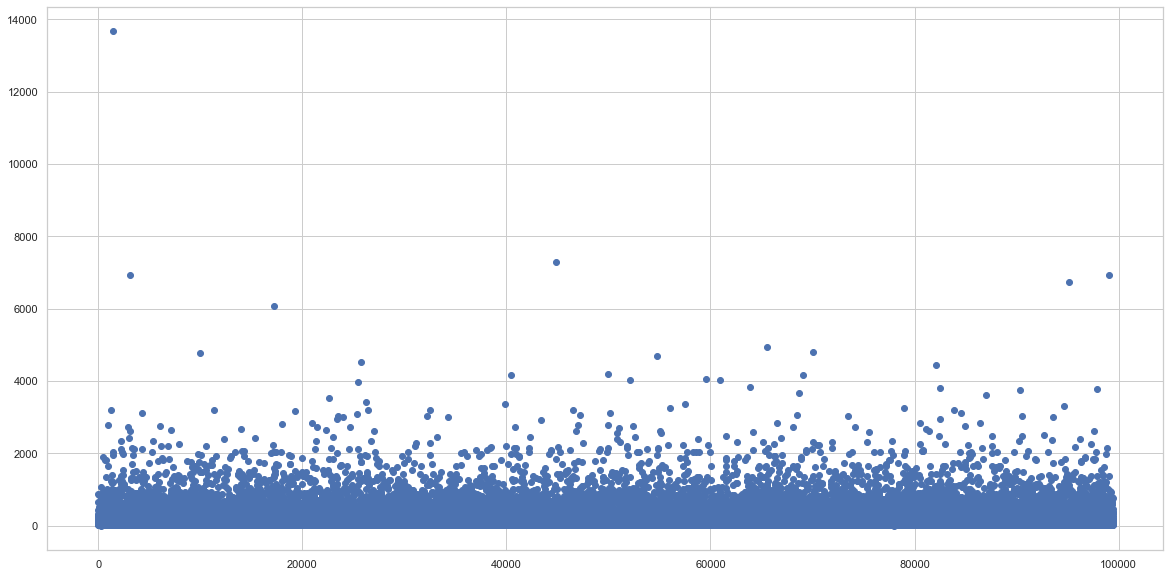

In [1247]:
# Kiểm tra outlier data
plt.figure(figsize=(20,10))

xs = df1.payment_value.values
plt.scatter(np.arange(0,len(xs)),xs)
plt.show();

=> Có 1 khách hàng mua rất nhiều, ta cùng tìm xem khách hàng này là ai

In [1248]:
df1.loc[df1['payment_value'] > 12000]

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,order_purchase_month,order_purchase_year
1471,03caa2c082116e1d31e67e9ae3700499,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,18.123345,9,2017


In [1249]:
order_item_df.loc[order_item_df['order_id'] == '03caa2c082116e1d31e67e9ae3700499']

,order_id,order_item_id,product_id,seller_id,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01


=> Dữ liệu này không phải lỗi

#### cÂU 1:Biểu đồ doanh thu 

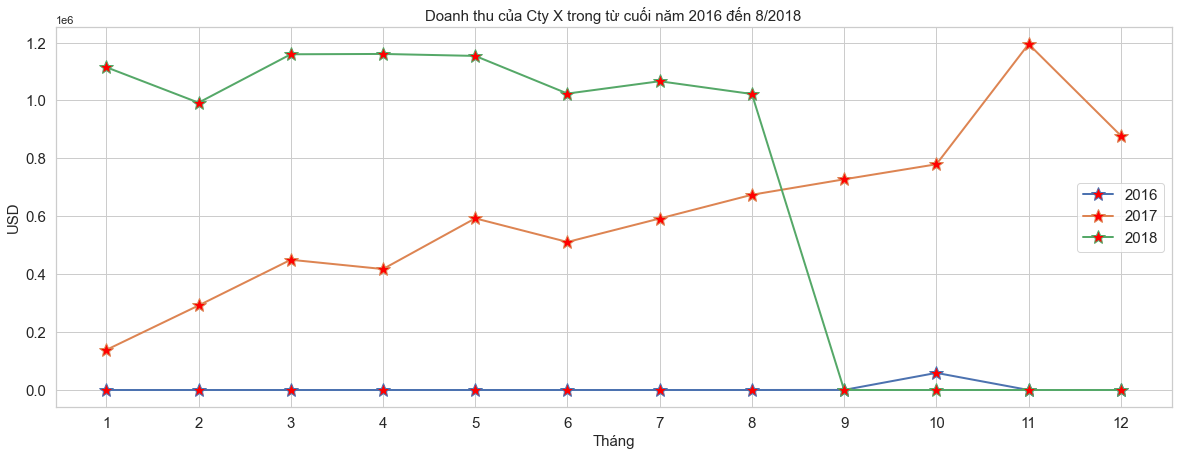

order_purchase_month payment_value                        
order_purchase_year                               2016        2017        2018
0                                      1          0.00   138488.04  1115004.18
1                                      2          0.00   291908.01   992463.34
2                                      3          0.00   449863.60  1159652.12
3                                      4          0.00   417788.03  1160785.48
4                                      5          0.00   592918.82  1153982.15
5                                      6          0.00   511276.38  1023880.50
6                                      7          0.00   592382.92  1066540.75
7                                      8          0.00   674396.32  1022361.43
8                                      9        252.24   727762.45        0.00
9                                     10      59090.48   779677.88        0.00
10                                    11          0.00  1194882.80        0.00
11                                    12         19.62   878401.48        0.00

In [1250]:
xs = doanhthu_table['order_purchase_month']
ys = doanhthu_table['payment_value']

plt.figure(figsize=(20,7))
plt.plot(xs, ys, linewidth=2, marker='*',markersize=15,markerfacecolor='red')
plt.xticks(xs,fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('USD',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Doanh thu của Cty X trong từ cuối năm 2016 đến 8/2018',fontsize=15)
plt.legend(doanhthu_table['payment_value'],fontsize=15)

# for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                     (x,y), # these are the coordinates to position the label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,10), # distance from text to points (x,y)
#                     ha='center') # horizontal alignment can be left, right or center

plt.show()
doanhthu_table

In [1251]:
 doanhthu_table = doanhthu_table.payment_value

In [1252]:
growth_rate_2016 = pd.Series(doanhthu_table[2016])
growth_rate_2017 = pd.Series(doanhthu_table[2017])
growth_rate_2018 = pd.Series(doanhthu_table[2018])

growth_rate = pd.concat([growth_rate_2017,growth_rate_2018])

In [1253]:
growth_rate_shift = growth_rate.shift(1)

In [1254]:
growth_rate

0      138488.04
1      291908.01
2      449863.60
3      417788.03
4      592918.82
5      511276.38
6      592382.92
7      674396.32
8      727762.45
9      779677.88
10    1194882.80
11     878401.48
0     1115004.18
1      992463.34
2     1159652.12
3     1160785.48
4     1153982.15
5     1023880.50
6     1066540.75
7     1022361.43
8           0.00
9           0.00
10          0.00
11          0.00
dtype: float64

In [1255]:
growth_rate_shift

0            NaN
1      138488.04
2      291908.01
3      449863.60
4      417788.03
5      592918.82
6      511276.38
7      592382.92
8      674396.32
9      727762.45
10     779677.88
11    1194882.80
0      878401.48
1     1115004.18
2      992463.34
3     1159652.12
4     1160785.48
5     1153982.15
6     1023880.50
7     1066540.75
8     1022361.43
9           0.00
10          0.00
11          0.00
dtype: float64

In [1256]:
growth_rate_table = pd.DataFrame(growth_rate/growth_rate_shift*100)
growth_rate_table.columns = ['growth_rate']

In [1257]:
date_range = pd.date_range(start='2017-01',freq='M',periods=24).strftime('%m-%Y')
growth_rate_table.set_index(date_range,inplace=True)

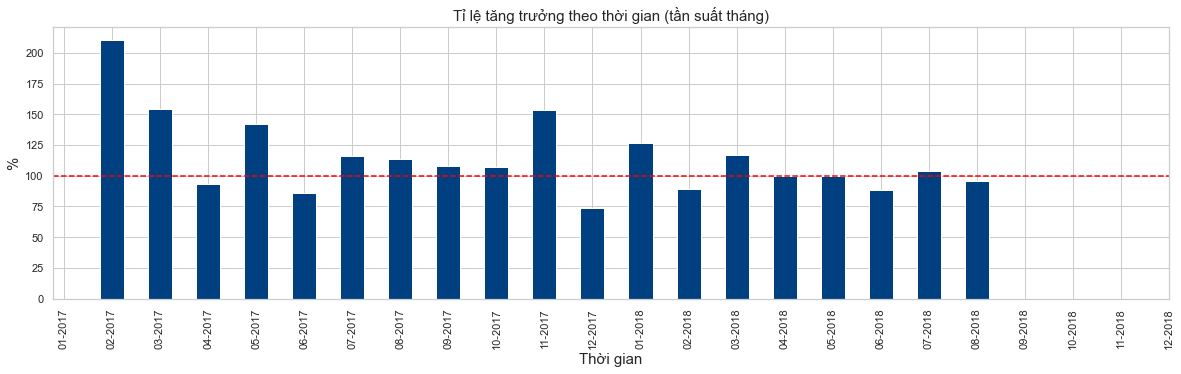

In [1258]:
plt.figure(figsize=(20,5))
plt.bar(growth_rate_table.index,growth_rate_table.growth_rate.values,width=0.5,color='#004080')
plt.axhline(100,color='red',linestyle='--')
plt.xticks(growth_rate_table.index,rotation=90)
plt.xlabel('Thời gian',fontsize=15)
plt.ylabel('%',fontsize=15)
plt.title('Tỉ lệ tăng trưởng theo thời gian (tần suất tháng)',fontsize=15)
plt.show()

In [1259]:
mean_rate = growth_rate_table.fillna

In [1260]:
growth_rate_table.index

Index(['01-2017', '02-2017', '03-2017', '04-2017', '05-2017', '06-2017',
       '07-2017', '08-2017', '09-2017', '10-2017', '11-2017', '12-2017',
       '01-2018', '02-2018', '03-2018', '04-2018', '05-2018', '06-2018',
       '07-2018', '08-2018', '09-2018', '10-2018', '11-2018', '12-2018'],
      dtype='object')

Nhận xét:
+ Doanh thu tăng lên theo thời gian trong năm 2017
+ Trong năm 2018 đến tháng 8, thì doanh thu khá ổn định qua các tháng

Khảo sát hành vi của khách hàng

In [1261]:
soluong_order = pd.pivot_table(data=df1,index='order_purchase_month',columns='order_purchase_year',values='order_id',aggfunc='count',fill_value=0).reset_index() 
soluong_order

order_purchase_year,order_purchase_month,2016,2017,2018
0,1,0,800,7269
1,2,0,1780,6728
2,3,0,2682,7211
3,4,0,2404,6939
4,5,0,3700,6873
5,6,0,3245,6167
6,7,0,4026,6292
7,8,0,4331,6511
8,9,3,4285,0
9,10,324,4631,0


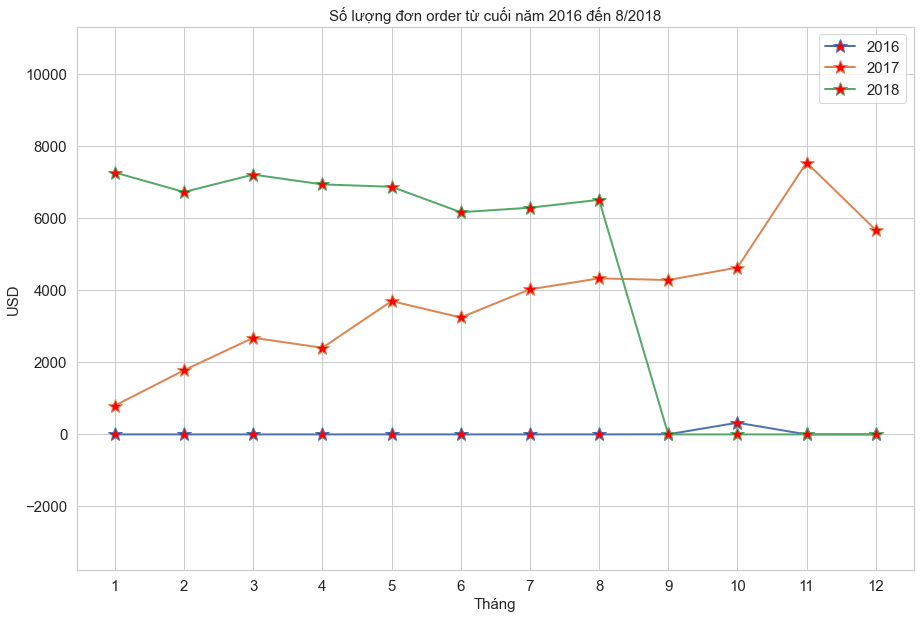

order_purchase_year,order_purchase_month,2016,2017,2018
0,1,0,800,7269
1,2,0,1780,6728
2,3,0,2682,7211
3,4,0,2404,6939
4,5,0,3700,6873
5,6,0,3245,6167
6,7,0,4026,6292
7,8,0,4331,6511
8,9,3,4285,0
9,10,324,4631,0


In [1262]:
xs = soluong_order['order_purchase_month']
ys = soluong_order[[2016,2017,2018]]

plt.figure(figsize=(15,10))
plt.plot(xs, ys, linewidth=2, marker='*',markersize=15,markerfacecolor='red')
plt.xticks(xs,fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('USD',fontsize=15)
high = np.max(ys.values)
low = np.min(ys.values)
plt.ylim(math.ceil(low - 0.5*(high-low)),math.ceil(high + 0.5*(high-low)))
plt.yticks(fontsize=15)
plt.title('Số lượng đơn order từ cuối năm 2016 đến 8/2018',fontsize=15)
plt.legend(ys,fontsize=15)

# for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                     (x,y), # these are the coordinates to position the label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,10), # distance from text to points (x,y)
#                     ha='center') # horizontal alignment can be left, right or center

plt.show()
soluong_order

In [1263]:
# Đâu là khu vực mang lại nhiều lợi nhuận nhất của công ty
# Merge bảng payment và order_dataset
location_order = orders_df.merge(order_payments_df,on=['order_id'],how='left')
location_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,1.0,cash,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,1.0,credit_card,3.0,179.12


In [1264]:
location_order = location_order.merge(customer_df,on=['customer_id'],how='left')
location_order = location_order.loc[location_order['order_id'].isin(orders_list)]
location_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103865 entries, 0 to 103886
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103865 non-null  object        
 1   customer_id                    103865 non-null  object        
 2   order_status                   103865 non-null  object        
 3   order_purchase_timestamp       103865 non-null  datetime64[ns]
 4   order_approved_at              103710 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101997 non-null  datetime64[ns]
 6   order_delivered_customer_date  100754 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103865 non-null  datetime64[ns]
 8   lead_time                      100754 non-null  float64       
 9   payment_sequential             103865 non-null  float64       
 10  payment_type                   103865 non-null  object        
 11  

In [1265]:
location_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 155
order_delivered_carrier_date     1868
order_delivered_customer_date    3111
order_estimated_delivery_date       0
lead_time                        3111
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [1266]:
doanhthu_khuvuc = pd.pivot_table(data=location_order,index='customer_state',values='payment_value',aggfunc='sum',fill_value=0)
doanhthu_khuvuc = doanhthu_khuvuc.sort_values(by='payment_value',ascending=False).reset_index()
doanhthu_khuvuc

,customer_state,payment_value
0,SP,5994672.90
1,RJ,2144058.88
2,MG,1871675.10
3,RS,890898.54
4,PR,811156.38
5,SC,622672.39
6,BA,616645.82
7,DF,355141.08
8,GO,350092.31
9,ES,325967.55


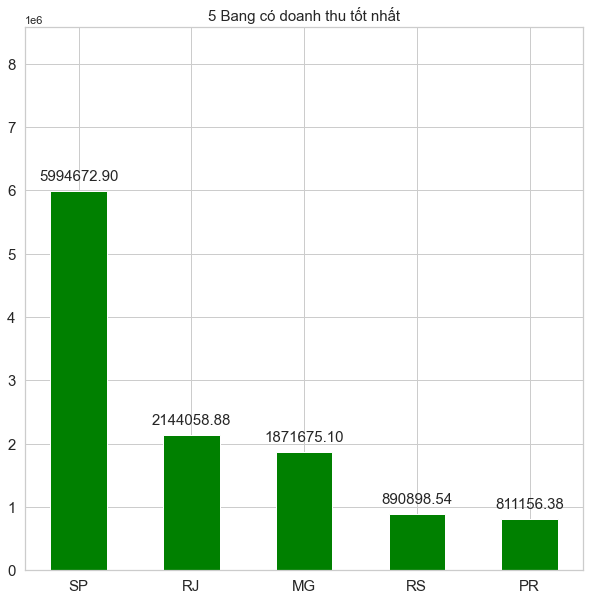

,customer_state,payment_value
0,SP,5994672.90
1,RJ,2144058.88
2,MG,1871675.10
3,RS,890898.54
4,PR,811156.38


In [1267]:
# 5 bang có doanh thu tốt nhất
top5_bang_doanhthu = doanhthu_khuvuc.head()
plt.figure(figsize=(10,10))

xs = top5_bang_doanhthu['customer_state']
ys = top5_bang_doanhthu['payment_value']
plt.bar(xs,ys,width=0.5,color='green')

high = max(ys)
low = min(ys)
plt.ylim(0,high + 0.5*(high-low))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('5 Bang có doanh thu tốt nhất',fontsize=15)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()
top5_bang_doanhthu

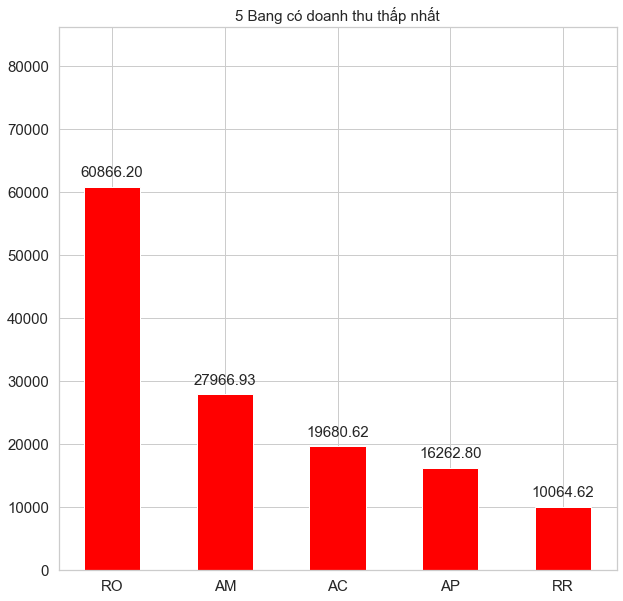

,customer_state,payment_value
22,RO,60866.20
23,AM,27966.93
24,AC,19680.62
25,AP,16262.80
26,RR,10064.62


In [1268]:
# 5 bang có doanh thu tệ nhất
tail5_bang_doanhthu = doanhthu_khuvuc.tail()
plt.figure(figsize=(10,10))

xs = tail5_bang_doanhthu['customer_state']
ys = tail5_bang_doanhthu['payment_value']
plt.bar(xs,ys,width=0.5,color='red')

high = max(ys)
low = min(ys)
plt.ylim(0,high + 0.5*(high-low))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('5 Bang có doanh thu thấp nhất',fontsize=15)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()
tail5_bang_doanhthu

#### Dòng sản phẩm bán chạy nhất

In [1269]:
hot_item = order_item_df.loc[order_item_df['order_id'].isin(orders_list)]
hot_item = hot_item.merge(products_df,on=['product_id'],how='left')
hot_item = hot_item.merge(product_category_name_trans_df, on=['product_category_name'],how='left')

In [1270]:
hot_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112646 entries, 0 to 112645
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112646 non-null  object 
 1   order_item_id                  112646 non-null  int64  
 2   product_id                     112646 non-null  object 
 3   seller_id                      112646 non-null  object 
 4   price                          112646 non-null  float64
 5   freight_value                  112646 non-null  float64
 6   product_category_name          111042 non-null  object 
 7   product_name_lenght            111042 non-null  float64
 8   product_description_lenght     111042 non-null  float64
 9   product_photos_qty             111042 non-null  float64
 10  product_weight_g               111042 non-null  float64
 11  product_length_cm              111042 non-null  float64
 12  product_height_cm             

In [1271]:
def check_null(x):
    print(x.isnull().sum())
    print('--------------------------------------------------------------------')

def drop_null(x):
    x.dropna(inplace=True)
    print(x.isnull().sum())

In [1272]:
check_null(hot_item)

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
product_category_name            1604
product_name_lenght              1604
product_description_lenght       1604
product_photos_qty               1604
product_weight_g                 1604
product_length_cm                1604
product_height_cm                1604
product_width_cm                 1604
product_category_name_english    1628
dtype: int64
--------------------------------------------------------------------


In [1273]:
drop_null(hot_item)

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


In [1274]:
count_item_hot = pd.pivot_table(data=hot_item,index='product_category_name_english',values='product_id',
                                aggfunc='count',fill_value=0).sort_values(by='product_id',ascending=False).reset_index()
price_item_hot = pd.pivot_table(data=hot_item,index='product_category_name_english',values='price',
                                aggfunc='sum',fill_value=0).sort_values(by='price',ascending=False).reset_index()
shipprice_item_hot = pd.pivot_table(data=hot_item,index='product_category_name_english',values='freight_value',
                                aggfunc='sum',fill_value=0).sort_values(by='freight_value',ascending=False).reset_index()

In [1275]:
total_price_item_hot = price_item_hot.merge(shipprice_item_hot,on=['product_category_name_english'],how='left')

total_price_item_hot['total'] =  total_price_item_hot['price'] + total_price_item_hot['freight_value']

total_price_item_hot['rateship_price'] = round((total_price_item_hot['freight_value']/total_price_item_hot['price'])*100,2)

total_price_item_hot.head()


,product_category_name_english,price,freight_value,total,rateship_price
0,health_beauty,1258546.37,182558.24,1441104.61,14.51
1,watches_gifts,1205005.68,100535.93,1305541.61,8.34
2,bed_bath_table,1036988.68,204693.04,1241681.72,19.74
3,sports_leisure,988048.97,168607.51,1156656.48,17.06
4,computers_accessories,911954.32,147318.08,1059272.40,16.15


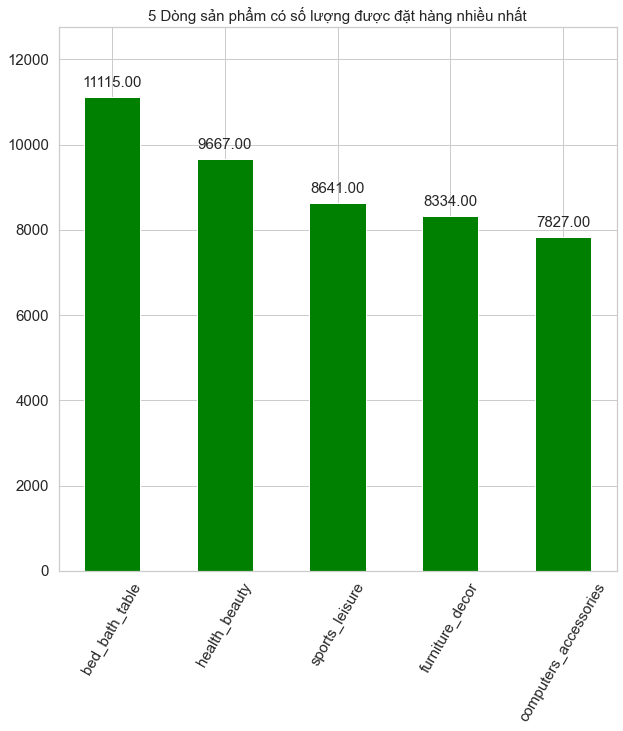

In [1276]:
temp_table = count_item_hot.head()
plt.figure(figsize=(10,10))

xs = temp_table['product_category_name_english']
ys = temp_table['product_id']

plt.bar(xs,ys,width=0.5,color='green')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('5 Dòng sản phẩm có số lượng được đặt hàng nhiều nhất',fontsize=15)

high = max(ys)
low = min(ys)
plt.ylim(0,high + 0.5*(high-low))

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()

plt.show()

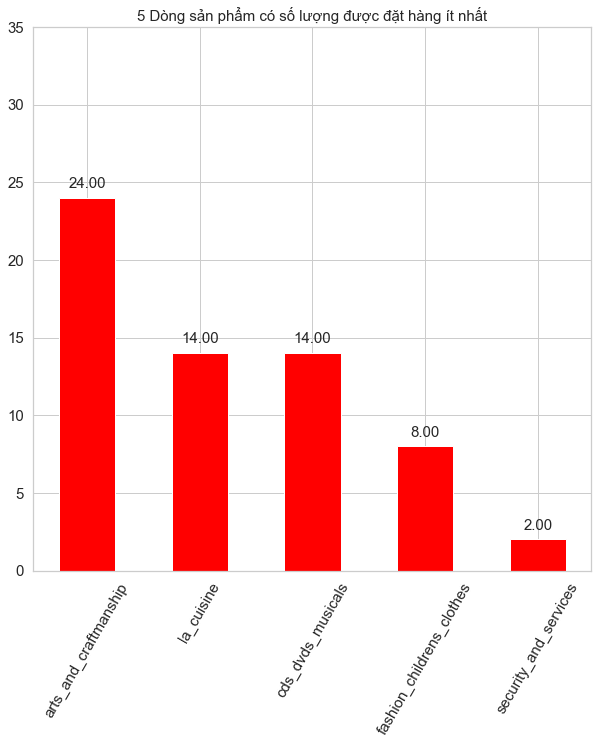

,product_category_name_english,product_id
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8
70,security_and_services,2


In [1277]:
temp_table = count_item_hot.tail()
plt.figure(figsize=(10,10))

xs = temp_table['product_category_name_english']
ys = temp_table['product_id']

plt.bar(xs,ys,width=0.5,color='red')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('5 Dòng sản phẩm có số lượng được đặt hàng ít nhất',fontsize=15)

high = max(ys)
low = min(ys)
plt.ylim(0,high + 0.5*(high-low))

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()

temp_table

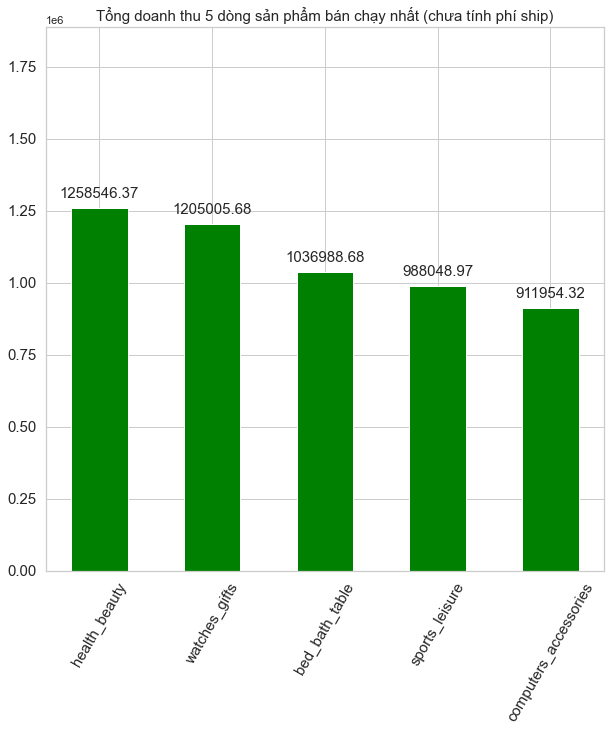

In [1278]:
# Vẽ tổng giá của 5 dòng sản phẩm cao nhất
xs = total_price_item_hot.sort_values(by='price',ascending=False)['product_category_name_english'].head()
ys = total_price_item_hot.sort_values(by='price',ascending=False)['price'].head()

plt.figure(figsize=(10,10))
plt.bar(xs,ys,width=0.5,color='green')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Tổng doanh thu 5 dòng sản phẩm bán chạy nhất (chưa tính phí ship)',fontsize=15)

high = max(ys)
plt.ylim(0,high + 0.5*high)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()


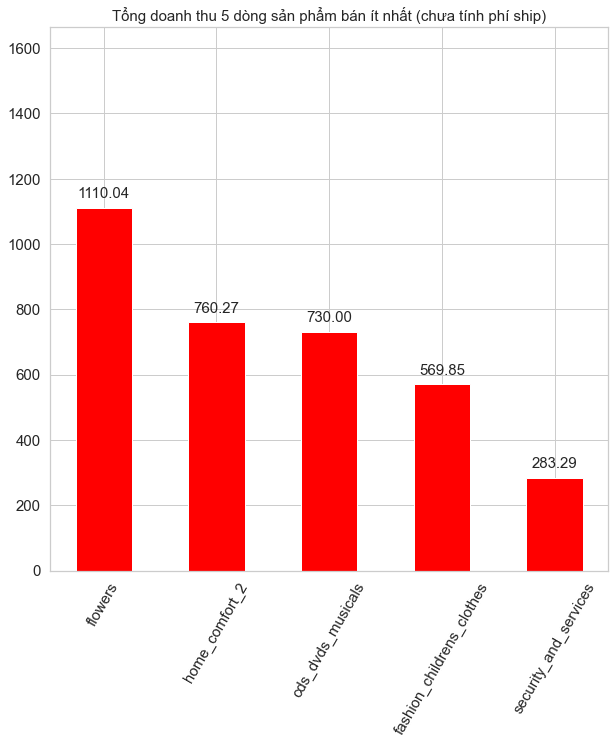

In [1279]:
# Vẽ tổng giá của 5 dòng sản phẩm cao nhất
xs = total_price_item_hot.sort_values(by='price',ascending=False)['product_category_name_english'].tail()
ys = total_price_item_hot.sort_values(by='price',ascending=False)['price'].tail()

plt.figure(figsize=(10,10))
plt.bar(xs,ys,width=0.5,color='red')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Tổng doanh thu 5 dòng sản phẩm bán ít nhất (chưa tính phí ship)',fontsize=15)

high = max(ys)
plt.ylim(0,high + 0.5*high)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()


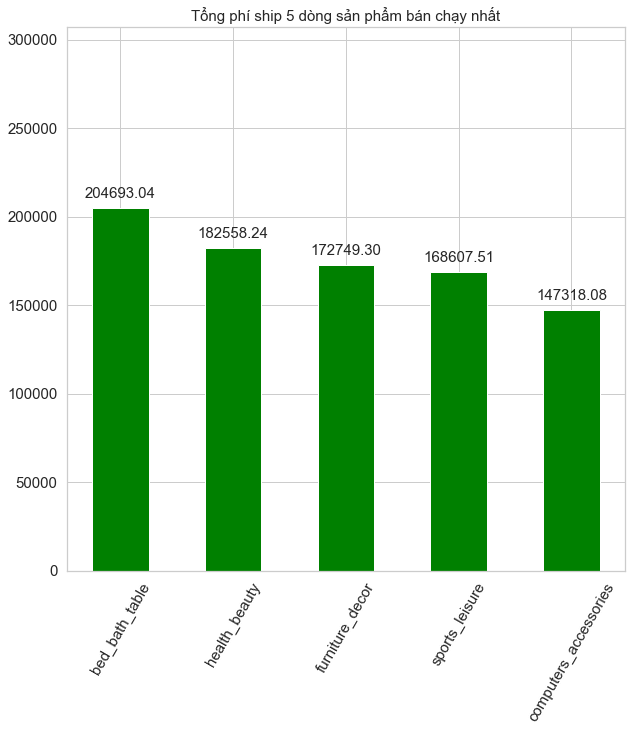

In [1280]:
# Phí ship của 5 dòng sản phẩm cao nhất
xs = total_price_item_hot.sort_values(by='freight_value',ascending=False)['product_category_name_english'].head()
ys = total_price_item_hot.sort_values(by='freight_value',ascending=False)['freight_value'].head()

plt.figure(figsize=(10,10))
plt.bar(xs,ys,width=0.5,color='green')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Tổng phí ship 5 dòng sản phẩm bán chạy nhất',fontsize=15)

high = max(ys)
plt.ylim(0,high + 0.5*high)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()


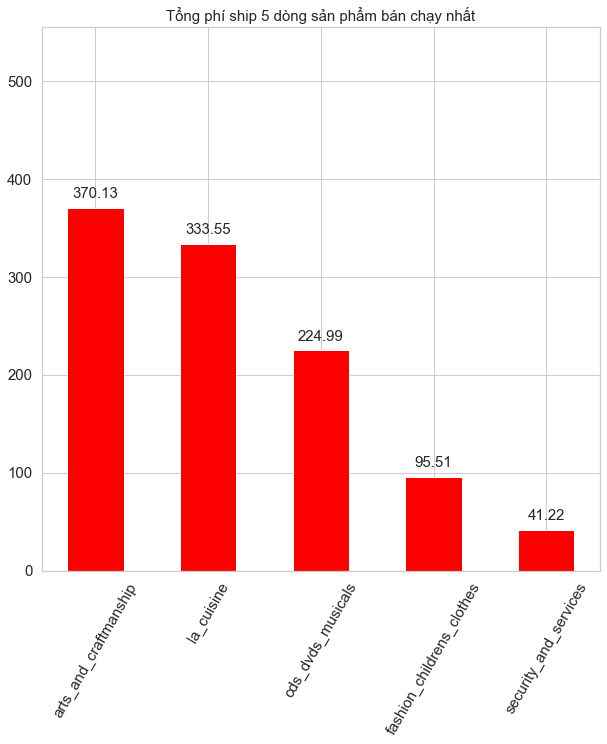

In [1281]:
# Phí ship của 5 dòng sản phẩm thấp nhất
xs = total_price_item_hot.sort_values(by='freight_value',ascending=False)['product_category_name_english'].tail()
ys = total_price_item_hot.sort_values(by='freight_value',ascending=False)['freight_value'].tail()

plt.figure(figsize=(10,10))
plt.bar(xs,ys,width=0.5,color='red')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Tổng phí ship 5 dòng sản phẩm bán chạy nhất',fontsize=15)

high = max(ys)
plt.ylim(0,high + 0.5*high)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()


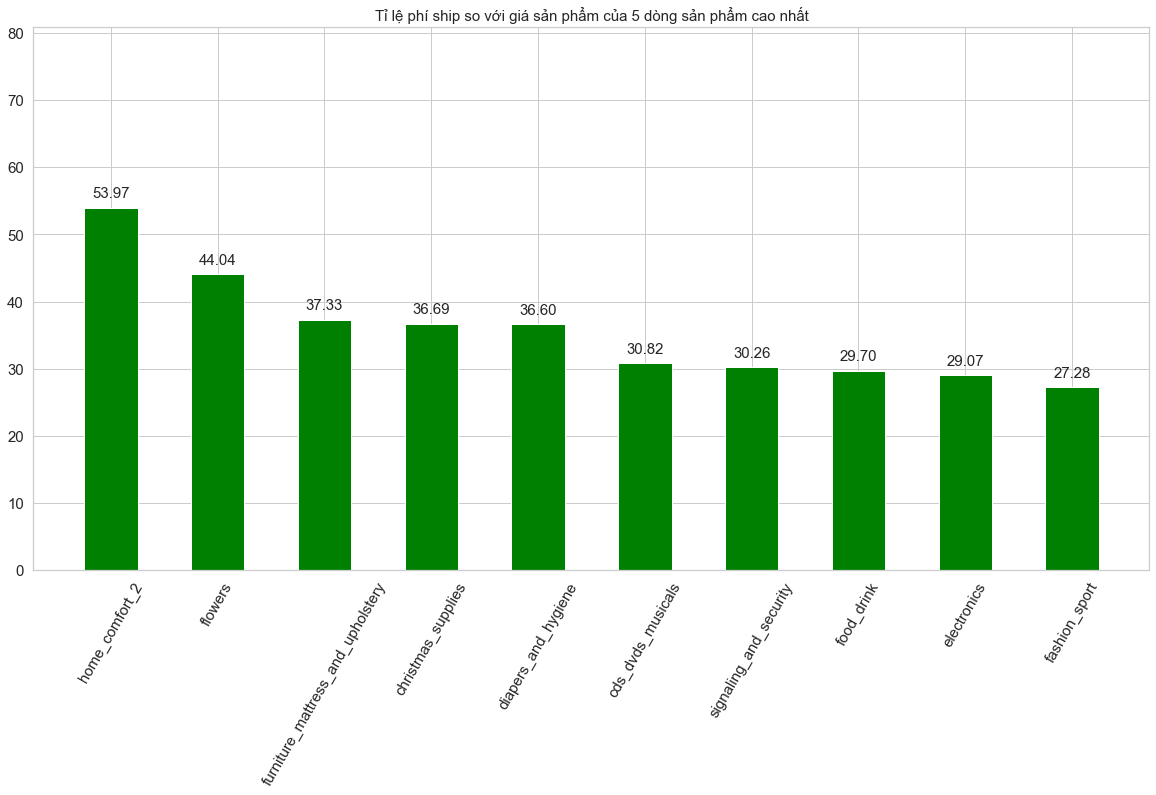

In [1282]:
# Tỉ lệ phí ship so với giá sản phẩm của 5 dòng sản phẩm cao nhất
xs = total_price_item_hot.sort_values(by='rateship_price',ascending=False)['product_category_name_english'].head(10)
ys = total_price_item_hot.sort_values(by='rateship_price',ascending=False)['rateship_price'].head(10)

plt.figure(figsize=(20,10))
plt.bar(xs,ys,width=0.5,color='green')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Tỉ lệ phí ship so với giá sản phẩm của 5 dòng sản phẩm cao nhất',fontsize=15)

high = max(ys)
plt.ylim(0,high + 0.5*high)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()


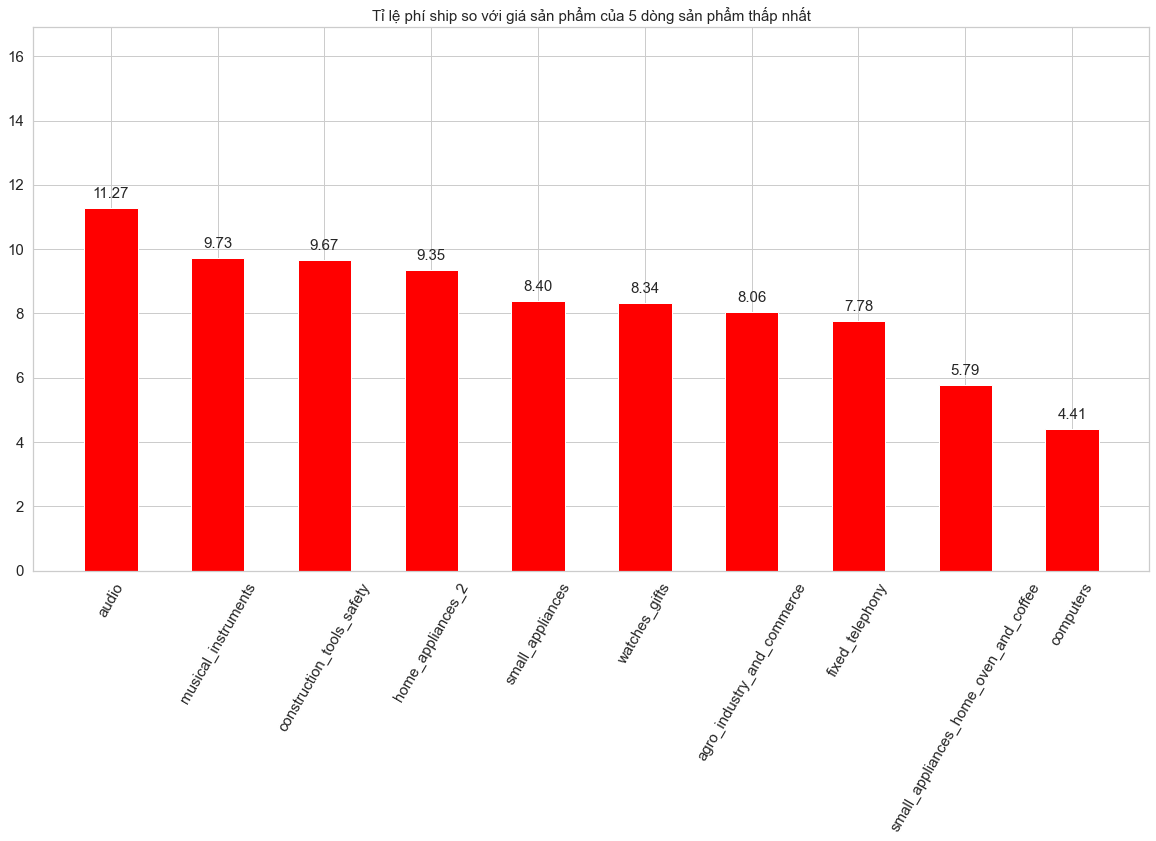

In [1283]:
# Tỉ lệ phí ship so với giá sản phẩm của 5 dòng sản phẩm thấp nhất
xs = total_price_item_hot.sort_values(by='rateship_price',ascending=False)['product_category_name_english'].tail(10)
ys = total_price_item_hot.sort_values(by='rateship_price',ascending=False)['rateship_price'].tail(10)

plt.figure(figsize=(20,10))
plt.bar(xs,ys,width=0.5,color='red')
plt.xticks(rotation=60,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Tỉ lệ phí ship so với giá sản phẩm của 5 dòng sản phẩm thấp nhất',fontsize=15)

high = max(ys)
plt.ylim(0,high + 0.5*high)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()


In [1284]:
values = orders_df.loc[orders_df['order_status'] == 'canceled']['order_id']
order_payments_df.loc[order_payments_df['order_id'].isin(values)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
28,5d9c5817e278892b7498d90bfa28ade8,1,credit_card,2,290.16
68,947e9c6bfd83a06953c420ef92d3da6e,1,voucher,1,69.46
235,f86d7bc39aab05299691322044b63bb2,1,voucher,1,1302.42
259,90eaac01afdf4e531a70ad869e092c75,1,credit_card,1,234.43
442,61792c6272346d7f4b7c5b1747df7b1a,1,credit_card,4,49.34
...,...,...,...,...,...
103390,56f251ca89f74d06076966d5d49b9dc6,1,credit_card,4,110.40
103757,ce0a53468ddde09e79f73edba370ceec,1,credit_card,6,81.89
103766,b17fd4c033b06e8d888de8ea6105ef9d,1,credit_card,5,103.10
103798,4f259869d5c650af6f847b027032515b,1,voucher,1,176.56


In [1285]:
# Phân tích xu hướng của các nhóm sản phẩm có tiềm năng
hot_item = hot_item.merge(orders_df,on=['order_id'],how='left')
hot_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111018 entries, 0 to 111017
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111018 non-null  object        
 1   order_item_id                  111018 non-null  int64         
 2   product_id                     111018 non-null  object        
 3   seller_id                      111018 non-null  object        
 4   price                          111018 non-null  float64       
 5   freight_value                  111018 non-null  float64       
 6   product_category_name          111018 non-null  object        
 7   product_name_lenght            111018 non-null  float64       
 8   product_description_lenght     111018 non-null  float64       
 9   product_photos_qty             111018 non-null  float64       
 10  product_weight_g               111018 non-null  float64       
 11  

In [1286]:
hot_item['order_month'] = hot_item['order_purchase_timestamp'].dt.month
hot_item['order_year'] = hot_item['order_purchase_timestamp'].dt.year
hot_item['total_price'] = hot_item['price'] + hot_item['freight_value']

In [1287]:
hot_item.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,order_month,order_year,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,58.0,598.0,4.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.614421,9,2017,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,56.0,239.0,2.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.216181,4,2017,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.948437,1,2018,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,42.0,480.0,1.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.147269,8,2018,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.114352,2,2017,218.04


#### TÌNH HÌNH KINH DOANH theo thời gian
+ Tổng số đơn theo order_status là bao nhiêu, chiếm tỉ lệ bao nhiêu?
+ Thời giản phản hồi mà người dùng đặt đơn, thồi gian chơ chốt đơn là bao nhiêu?
+ Thời gian vận chuyển người dùng nhận đơn là bao nhiêu ngày, tỉ lệ trước ngày dự đoán là bao nhiêu?
Nhìn chung thì tình hình kinh doanh đang đi lên hay đi xuống? nếu đi xuống thì đưa ra các giải pháp và các hướng phát triển để cải thiện tình hình kinh doanh
 

##### Câu 1:Tổng số đơn theo order_status là bao nhiêu, chiếm tỉ lệ bao nhiêu?

In [1288]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877


In [1289]:
orders_df_1 = orders_df.loc[orders_df['order_id'].isin(orders_list)]

In [1290]:
check_null(orders_df_1)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 140
order_delivered_carrier_date     1763
order_delivered_customer_date    2944
order_estimated_delivery_date       0
lead_time                        2944
dtype: int64
--------------------------------------------------------------------


In [1291]:
orders_df_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877


In [1292]:
status_orders = round(pd.pivot_table(data=orders_df_1,values='order_id',index='order_status',aggfunc='count',fill_value=0).reset_index())
status_orders.sort_values(by='order_id')

,order_status,order_id
0,approved,2
2,created,5
5,processing,301
4,invoiced,314
1,canceled,605
7,unavailable,609
6,shipped,1106
3,delivered,96477


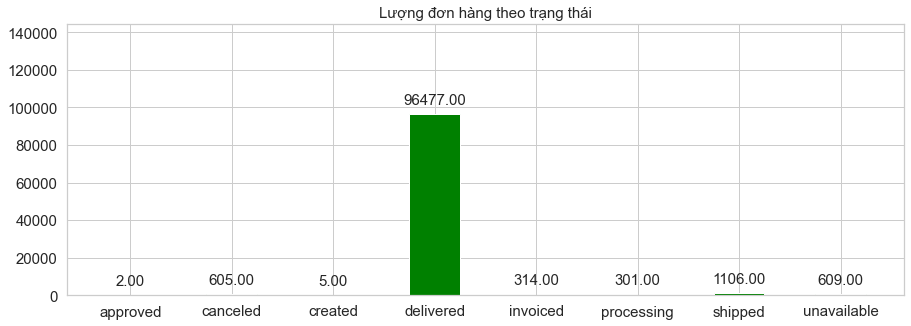

,order_status,order_id,rate
3,delivered,96477,97.04
6,shipped,1106,1.11
1,canceled,605,0.61
7,unavailable,609,0.61
4,invoiced,314,0.32
5,processing,301,0.30
2,created,5,0.01
0,approved,2,0.00


In [1293]:
plt.figure(figsize=(15,5))

xs = status_orders.order_status
ys = status_orders.order_id
plt.bar(status_orders.order_status, status_orders.order_id,width=0.5,color='green')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Lượng đơn hàng theo trạng thái',fontsize=15)
plt.ylim(0,max(status_orders.order_id) + 0.5*max(status_orders.order_id))

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center


plt.show();
status_orders['rate'] = round((status_orders['order_id']/sum(status_orders['order_id'].values))*100,2)
status_orders.sort_values(by='rate',ascending=False)

Kiểm tra xem tình hình đơn hủy và đơn không có sẵn theo thời gian

In [1294]:
orders_df_1['oders_month'] = orders_df_1['order_purchase_timestamp'].dt.month
orders_df_1['oders_year'] = orders_df_1['order_purchase_timestamp'].dt.year

In [1295]:
canceled_order = orders_df_1.loc[orders_df_1['order_status'] == 'canceled']
canceled_order_timeseries = pd.pivot_table(data=canceled_order,values='order_id',aggfunc='count',index='oders_month',columns='oders_year',fill_value=0).reset_index()
canceled_order_timeseries

oders_year,oders_month,2016,2017,2018
0,1,0,3,34
1,2,0,17,73
2,3,0,33,26
3,4,0,18,15
4,5,0,29,24
5,6,0,16,18
6,7,0,28,41
7,8,0,27,83
8,9,2,20,0
9,10,24,26,0


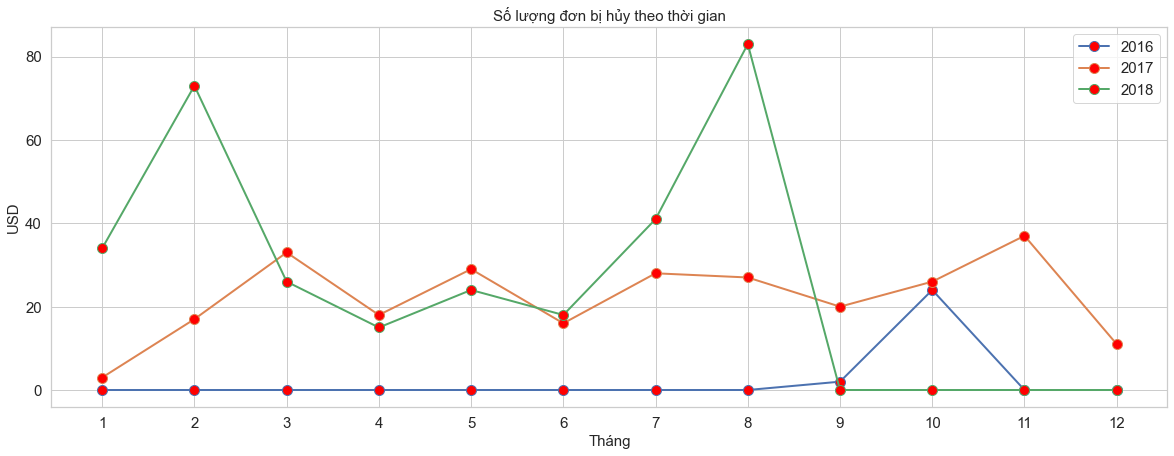

oders_year,oders_month,2016,2017,2018
0,1,0,3,34
1,2,0,17,73
2,3,0,33,26
3,4,0,18,15
4,5,0,29,24
5,6,0,16,18
6,7,0,28,41
7,8,0,27,83
8,9,2,20,0
9,10,24,26,0


In [1296]:
xs = canceled_order_timeseries['oders_month']
ys = canceled_order_timeseries[[2016,2017,2018]]

plt.figure(figsize=(20,7))
plt.plot(xs, ys, linewidth=2, marker='o',markersize=10,markerfacecolor='red')
plt.xticks(xs,fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('USD',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Số lượng đơn bị hủy theo thời gian',fontsize=15)
plt.legend(['2016','2017','2018'],fontsize=15)

# for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                     (x,y), # these are the coordinates to position the label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,10), # distance from text to points (x,y)
#                     ha='center') # horizontal alignment can be left, right or center

plt.show()
canceled_order_timeseries

In [1297]:
# Nhóm hàng bị hủy nhiều nhất là gì ?
product_category_canceled_order = order_item_df.merge(canceled_order,on='order_id',how='left')
product_category_canceled_order.dropna(subset='order_status',inplace=True)

In [1298]:
product_category_canceled_order = product_category_canceled_order.merge(products_df,on='product_id',how='left')
product_category_canceled_order = product_category_canceled_order.merge(product_category_name_trans_df,on='product_category_name',how='left')

In [1299]:
product_category_canceled_order.order_status.unique()

array(['canceled'], dtype=object)

In [1300]:
product_category_canceled = pd.pivot_table(data=product_category_canceled_order,values='order_id',aggfunc='count',index='product_category_name_english',fill_value=0)
product_category_canceled = product_category_canceled.sort_values(by='order_id',ascending=False)

In [1301]:
product_category_canceled.head()

,order_id
product_category_name_english,
sports_leisure,51
housewares,49
computers_accessories,46
health_beauty,36
furniture_decor,36


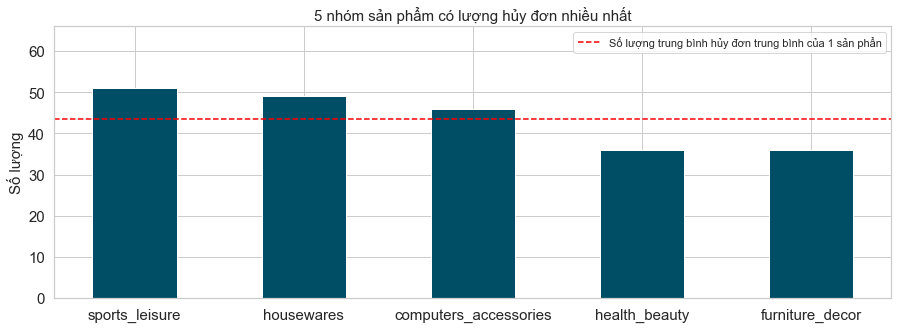

,order_id
product_category_name_english,
sports_leisure,51
housewares,49
computers_accessories,46
health_beauty,36
furniture_decor,36


In [1302]:
xs = product_category_canceled.head().index
ys = product_category_canceled['order_id'].head()

plt.figure(figsize=(15,5))
plt.bar(xs,ys,color='#004d66',width=0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
high = max(ys)
low = min(ys)
plt.ylim(0,high+1*(high-low))
plt.title('5 nhóm sản phẩm có lượng hủy đơn nhiều nhất',fontsize=15)
plt.axhline(np.mean(ys),color='red',linestyle='--',label='Số lượng trung bình hủy đơn trung bình của 1 sản phẩn')
plt.ylabel('Số lượng',fontsize=15)
plt.legend()

plt.show();
product_category_canceled.head()

#### CÂU 2: Thời giản phản hồi mà người dùng đặt đơn, thồi gian chơ chốt đơn là bao nhiêu?

In [1303]:
df1['order_purchase_hour'] = df1['order_purchase_timestamp'].dt.strftime('%H')
df1['order_purchase_hour'] = pd.to_numeric(df1['order_purchase_hour'])
df1 = df1.loc[df1['order_id'].isin(orders_list)]

In [1304]:
gio_order_table= pd.pivot_table(data=df1,index='order_purchase_hour',values='order_id',aggfunc='count',fill_value=0).reset_index()
gio_order_table

,order_purchase_hour,order_id
0,0,2394
1,1,1170
2,2,510
3,3,272
4,4,206
5,5,188
6,6,502
7,7,1231
8,8,2966
9,9,4782


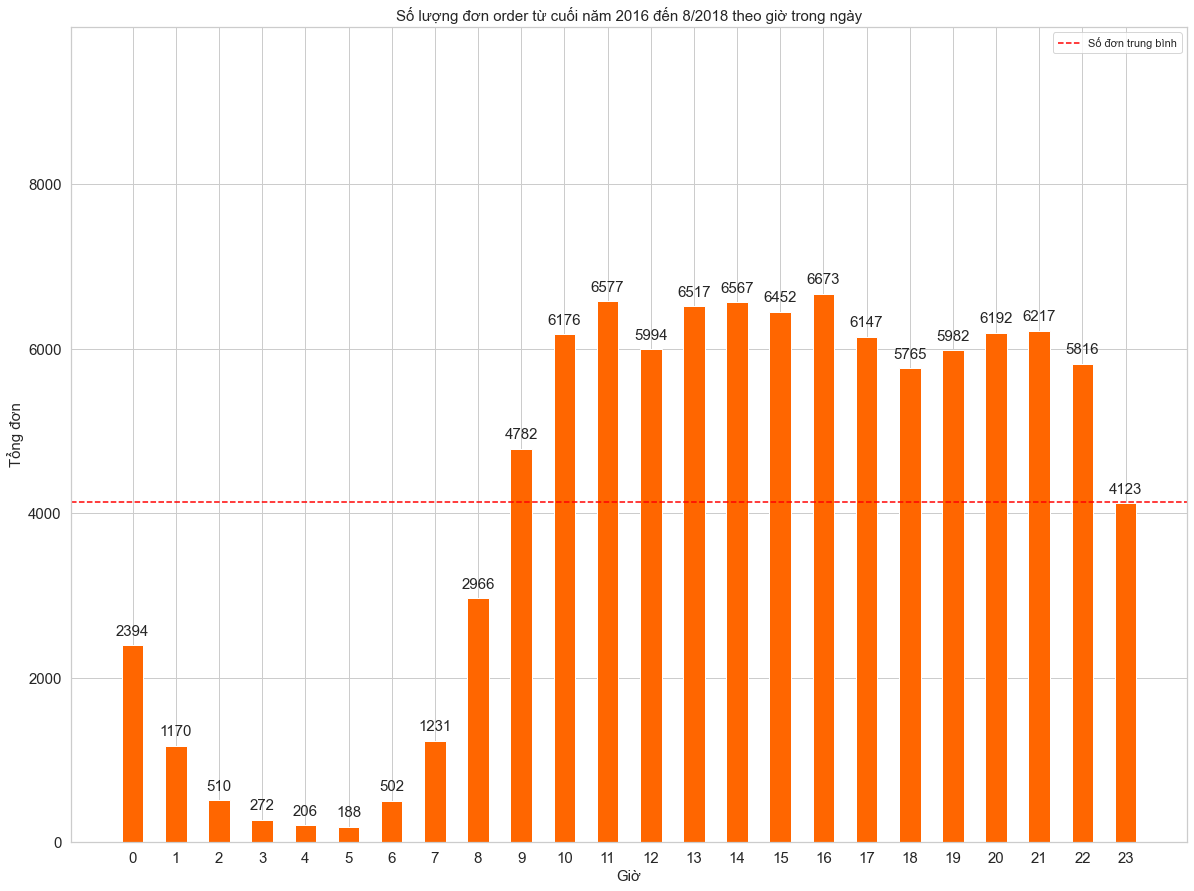

,order_purchase_hour,order_id
0,0,2394
1,1,1170
2,2,510
3,3,272
4,4,206
5,5,188
6,6,502
7,7,1231
8,8,2966
9,9,4782


In [1305]:
xs = gio_order_table['order_purchase_hour']
ys = gio_order_table['order_id'].values

plt.figure(figsize=(20,15))
plt.bar(xs, ys, width=0.5,color='#ff6600')
plt.axhline(np.mean(ys),color='red',linestyle='--', label='Số đơn trung bình')
plt.xticks(xs,fontsize=15)
plt.xlabel('Giờ',fontsize=15)
plt.ylabel('Tổng đơn',fontsize=15)
high = np.max(ys)
low = np.min(ys)
plt.ylim(0,math.ceil(high + 0.5*(high-low)))
plt.yticks(fontsize=15)
plt.title('Số lượng đơn order từ cuối năm 2016 đến 8/2018 theo giờ trong ngày',fontsize=15)
plt.legend()

for x,y in zip(xs,ys):

        label = "{:.0f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show();
gio_order_table

In [1306]:
df1.head()

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,order_purchase_month,order_purchase_year,order_purchase_hour
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.614421,9,2017,8
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.216181,4,2017,10
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.948437,1,2018,14
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.147269,8,2018,10
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.114352,2,2017,13


In [1307]:
df1['lead_time_approved'] = df1['order_approved_at'] - df1['order_purchase_timestamp']
df1['lead_time_delivered_carrier'] = df1['order_delivered_carrier_date'] -  df1['order_approved_at']
df1.head()

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,order_purchase_month,order_purchase_year,order_purchase_hour,lead_time_approved,lead_time_delivered_carrier
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.614421,9,2017,8,0 days 00:46:33,6 days 08:48:41
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.216181,4,2017,10,0 days 00:12:07,8 days 03:29:47
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.948437,1,2018,14,0 days 00:14:59,1 days 21:48:18
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.147269,8,2018,10,0 days 00:09:43,2 days 03:17:42
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.114352,2,2017,13,0 days 00:12:22,11 days 19:35:56


In [1308]:
df1['lead_time_approved_convert'] = df1['lead_time_approved'].dt.total_seconds()/3600
df1['lead_time_delivered_carrier_convert'] = df1['lead_time_delivered_carrier'].dt.total_seconds()/3600
df1.head()

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,order_purchase_month,order_purchase_year,order_purchase_hour,lead_time_approved,lead_time_delivered_carrier,lead_time_approved_convert,lead_time_delivered_carrier_convert
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.614421,9,2017,8,0 days 00:46:33,6 days 08:48:41,0.775833,152.811389
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.216181,4,2017,10,0 days 00:12:07,8 days 03:29:47,0.201944,195.496389
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.948437,1,2018,14,0 days 00:14:59,1 days 21:48:18,0.249722,45.805000
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.147269,8,2018,10,0 days 00:09:43,2 days 03:17:42,0.161944,51.295000
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.114352,2,2017,13,0 days 00:12:22,11 days 19:35:56,0.206111,283.598889


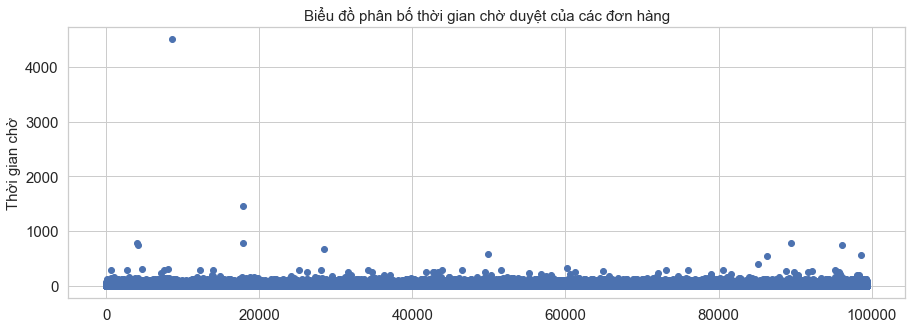

In [1309]:
plt.figure(figsize=(15,5))
plt.scatter(np.arange(len(df1)),df1.lead_time_approved_convert)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Thời gian chờ',fontsize=15)
plt.title('Biểu đồ phân bố thời gian chờ duyệt của các đơn hàng',fontsize=15)
plt.show();

Tồn tại dữ liệu outlier, cần loại bỏ nó

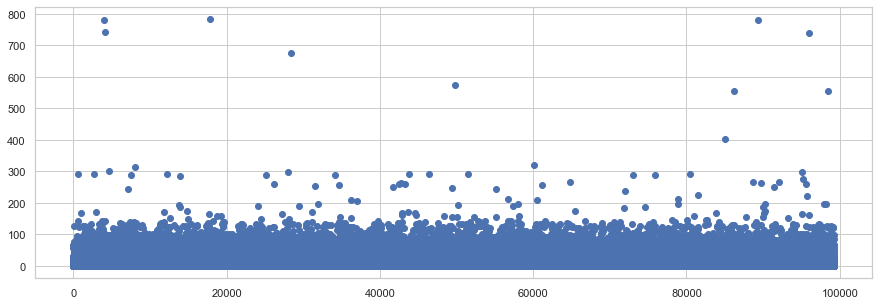

In [1310]:
df1 = df1.loc[df1['lead_time_approved_convert'] < 1000]

plt.figure(figsize=(15,5))
plt.scatter(np.arange(len(df1)),df1.lead_time_approved_convert)
plt.show();

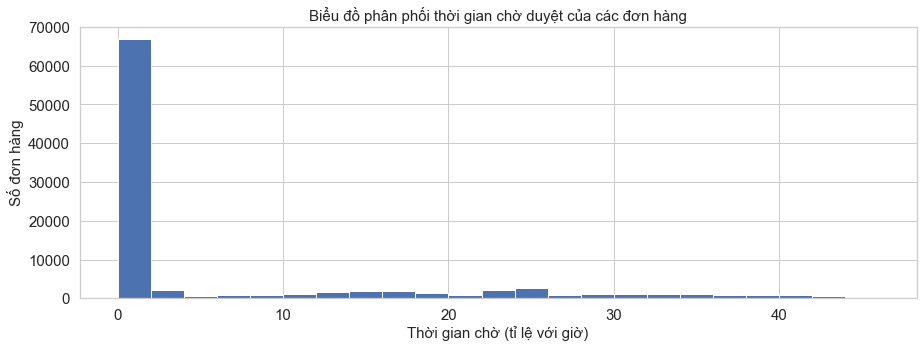

In [1311]:
plt.figure(figsize=(15,5))
# step = np.arange(0,max(df1.lead_time_approved_convert),0.1)
plt.hist(df1.lead_time_approved_convert,bins=np.arange(0,48,2))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Thời gian chờ (tỉ lệ với giờ)',fontsize=15)
plt.ylabel('Số đơn hàng',fontsize=15)
plt.title('Biểu đồ phân phối thời gian chờ duyệt của các đơn hàng',fontsize=15)
plt.show();

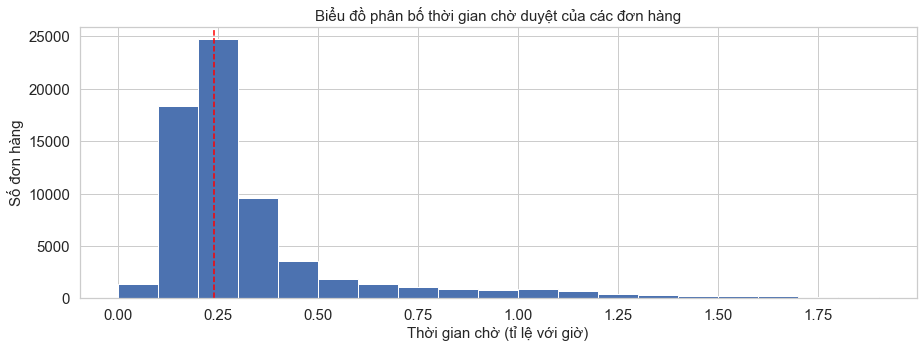

In [1312]:
plt.figure(figsize=(15,5))
# step = np.arange(0,max(df1.lead_time_approved_convert),0.1)
plt.hist(df1.lead_time_approved_convert,bins=np.arange(0,2,0.1))
plt.axvline(np.mean(df1.loc[df1['lead_time_approved_convert'] < 0.5]['lead_time_approved_convert']),color='red',linestyle='--')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Thời gian chờ (tỉ lệ với giờ)',fontsize=15)
plt.ylabel('Số đơn hàng',fontsize=15)
plt.title('Biểu đồ phân bố thời gian chờ duyệt của các đơn hàng',fontsize=15)
plt.show();

T phân thời gian chờ duyệt theo 3 nhóm: sớm, trung bình và trễ dựa vào biểu đồ trên
+ Nhanh: 0 --> 0.23 (giờ) ==> 14 phút
+ Trung bình: 0.23 --> 0.5 ==>30 phút
+ Chậm: > 0.5 

In [1313]:
df1.loc[(df1['lead_time_approved_convert'] >= 0) & (df1['lead_time_approved_convert'] <= 0.23),['type_approved']] = 'Nhanh'
df1.loc[(df1['lead_time_approved_convert'] > 0.23) & (df1['lead_time_approved_convert'] <= 0.5),['type_approved']] = 'Trung bình'
df1.loc[df1['lead_time_approved_convert'] > 0.5,['type_approved']] = 'Chậm'

In [1314]:
df1[df1.type_approved.isnull()]

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,order_purchase_month,order_purchase_year,order_purchase_hour,lead_time_approved,lead_time_delivered_carrier,lead_time_approved_convert,lead_time_delivered_carrier_convert,type_approved


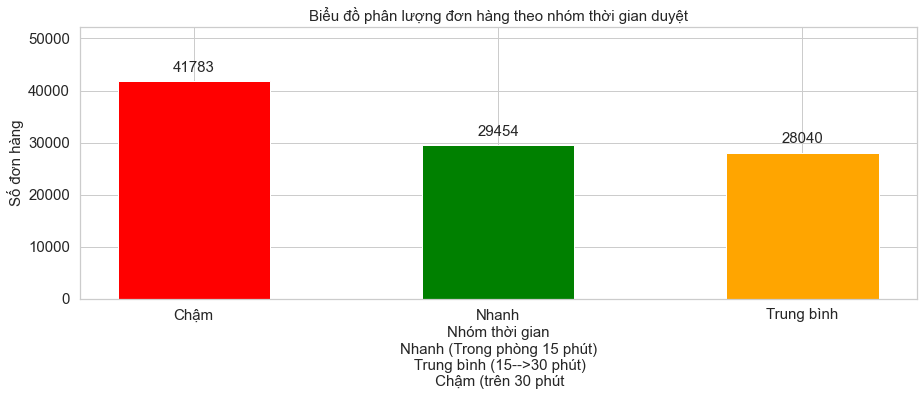

,type_approved,order_id,Rate
0,Chậm,41783,42.0
1,Nhanh,29454,30.0
2,Trung bình,28040,28.0


In [1315]:
type_approved = pd.pivot_table(data=df1,values='order_id',index='type_approved',aggfunc='count',fill_value=0).reset_index()
type_approved['Rate'] = round(type_approved['order_id']/sum(type_approved['order_id']),2)*100

plt.figure(figsize=(15,5))
plt.bar(type_approved.type_approved,type_approved.order_id,width=0.5,color=['red','green','orange'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Nhóm thời gian' + '\n' + 'Nhanh (Trong phòng 15 phút)' + '\n Trung bình (15-->30 phút)' + '\n Chậm (trên 30 phút',fontsize=15)
plt.ylabel('Số đơn hàng',fontsize=15)
plt.title('Biểu đồ phân lượng đơn hàng theo nhóm thời gian duyệt',fontsize=15)
high = max(type_approved.order_id)
plt.ylim(0,high + 0.25*high)

xs = type_approved.type_approved
ys = type_approved.order_id
for x,y in zip(xs,ys):

        label = "{:.0f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center


plt.show()
type_approved

LEAD TIME THEO THỜI GIAN

In [1316]:
df1.lead_time = round(df1.lead_time)

In [1317]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99277 entries, 0 to 99439
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   order_id                             99277 non-null  object         
 1   payment_value                        99277 non-null  float64        
 2   customer_id                          99277 non-null  object         
 3   order_status                         99277 non-null  object         
 4   order_purchase_timestamp             99277 non-null  datetime64[ns] 
 5   order_approved_at                    99277 non-null  datetime64[ns] 
 6   order_delivered_carrier_date         97642 non-null  datetime64[ns] 
 7   order_delivered_customer_date        96461 non-null  datetime64[ns] 
 8   order_estimated_delivery_date        99277 non-null  datetime64[ns] 
 9   lead_time                            96461 non-null  float64        
 10

In [1318]:
df1.isnull().sum()

order_id                                  0
payment_value                             0
customer_id                               0
order_status                              0
order_purchase_timestamp                  0
order_approved_at                         0
order_delivered_carrier_date           1635
order_delivered_customer_date          2816
order_estimated_delivery_date             0
lead_time                              2816
order_purchase_month                      0
order_purchase_year                       0
order_purchase_hour                       0
lead_time_approved                        0
lead_time_delivered_carrier            1635
lead_time_approved_convert                0
lead_time_delivered_carrier_convert    1635
type_approved                             0
dtype: int64

In [1319]:
df1_temp = df1.dropna(subset='lead_time')

In [1320]:
lead_time_timeseries = round(pd.pivot_table(data=df1_temp,index='order_purchase_month',columns='order_purchase_year',values='lead_time',aggfunc=np.mean,fill_value=0).reset_index())
lead_time_timeseries

order_purchase_year,order_purchase_month,2016,2017,2018
0,1,0.0,13.0,14.0
1,2,0.0,13.0,17.0
2,3,0.0,13.0,16.0
3,4,0.0,15.0,11.0
4,5,0.0,11.0,11.0
5,6,0.0,12.0,9.0
6,7,0.0,12.0,9.0
7,8,0.0,11.0,8.0
8,9,0.0,12.0,0.0
9,10,20.0,12.0,0.0


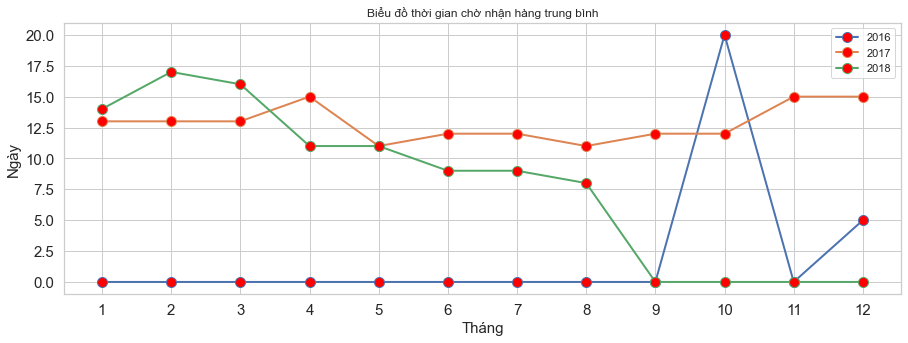

order_purchase_year,order_purchase_month,2016,2017,2018
0,1,0.0,13.0,14.0
1,2,0.0,13.0,17.0
2,3,0.0,13.0,16.0
3,4,0.0,15.0,11.0
4,5,0.0,11.0,11.0
5,6,0.0,12.0,9.0
6,7,0.0,12.0,9.0
7,8,0.0,11.0,8.0
8,9,0.0,12.0,0.0
9,10,20.0,12.0,0.0


In [1321]:
xs = lead_time_timeseries['order_purchase_month']
ys = lead_time_timeseries[[2016,2017,2018]]

plt.figure(figsize=(15,5))
plt.plot(xs, ys, linewidth=2, marker='o',markersize=10,markerfacecolor='red')
plt.xticks(xs,fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Ngày',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Biểu đồ thời gian chờ nhận hàng trung bình')
plt.legend([2016,2017,2018])

# for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                     (x,y), # these are the coordinates to position the label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,10), # distance from text to points (x,y)
#                     ha='center') # horizontal alignment can be left, right or center

plt.show()
lead_time_timeseries

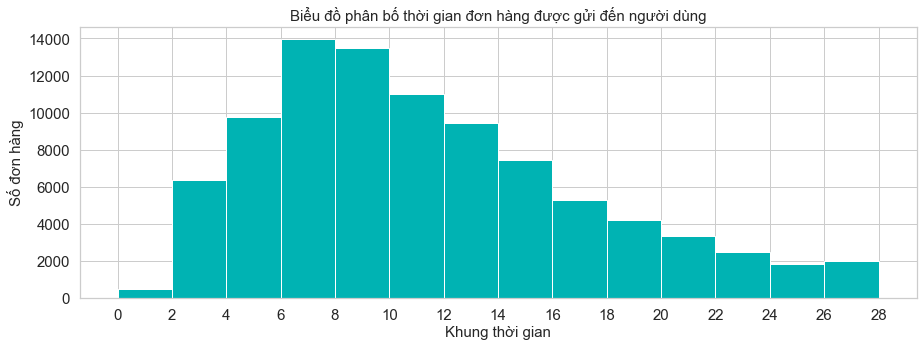

In [1322]:
plt.figure(figsize=(15,5))
plt.hist(round(df1_temp.lead_time),bins=np.arange(0,30,2),color='#00b3b3')
plt.yticks(fontsize=15)
plt.xticks(np.arange(0,30,2),fontsize=15)
plt.xlabel('Khung thời gian',fontsize=15)
plt.ylabel('Số đơn hàng',fontsize=15)
plt.title('Biểu đồ phân bố thời gian đơn hàng được gửi đến người dùng',fontsize=15)
plt.show();

In [1323]:
df1.isnull().sum()

order_id                                  0
payment_value                             0
customer_id                               0
order_status                              0
order_purchase_timestamp                  0
order_approved_at                         0
order_delivered_carrier_date           1635
order_delivered_customer_date          2816
order_estimated_delivery_date             0
lead_time                              2816
order_purchase_month                      0
order_purchase_year                       0
order_purchase_hour                       0
lead_time_approved                        0
lead_time_delivered_carrier            1635
lead_time_approved_convert                0
lead_time_delivered_carrier_convert    1635
type_approved                             0
dtype: int64

THỐNG KÊ SỐ LƯỢNG ĐƠN HÀNG GIAO TRƯỚC THỜI ĐIỂM DỰ ĐOÁN THEO THỜI GIAN?

In [1324]:
df1['sub_estimate_real_ship'] = df1['order_estimated_delivery_date'] - df1['order_delivered_customer_date']
df1['sub_estimate_real_ship'] = pd.to_numeric(df1['sub_estimate_real_ship'].dt.total_seconds()/86400)
df1.isnull().sum()

order_id                                  0
payment_value                             0
customer_id                               0
order_status                              0
order_purchase_timestamp                  0
order_approved_at                         0
order_delivered_carrier_date           1635
order_delivered_customer_date          2816
order_estimated_delivery_date             0
lead_time                              2816
order_purchase_month                      0
order_purchase_year                       0
order_purchase_hour                       0
lead_time_approved                        0
lead_time_delivered_carrier            1635
lead_time_approved_convert                0
lead_time_delivered_carrier_convert    1635
type_approved                             0
sub_estimate_real_ship                 2816
dtype: int64

In [1325]:
df1_temp = df1.dropna(subset='sub_estimate_real_ship')
df1_temp.isnull().sum()

order_id                               0
payment_value                          0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                      0
order_delivered_carrier_date           1
order_delivered_customer_date          0
order_estimated_delivery_date          0
lead_time                              0
order_purchase_month                   0
order_purchase_year                    0
order_purchase_hour                    0
lead_time_approved                     0
lead_time_delivered_carrier            1
lead_time_approved_convert             0
lead_time_delivered_carrier_convert    1
type_approved                          0
sub_estimate_real_ship                 0
dtype: int64

In [1326]:
df1_temp['sub_estimate_real_ship'] = df1_temp['sub_estimate_real_ship'].apply(lambda x: math.floor(x))
df1_temp['sub_estimate_real_ship']

0         8
1         2
2        13
3         5
4        15
         ..
99435     7
99436     8
99437    12
99438     8
99439    13
Name: sub_estimate_real_ship, Length: 96461, dtype: int64

In [1327]:
df1_temp.loc[df1_temp['sub_estimate_real_ship'] > 0,['ship_type']] = 'Trước'
df1_temp.loc[df1_temp['sub_estimate_real_ship'] <= 0,['ship_type']] = 'Sau'

In [1328]:
df1_temp['ship_type'].unique()

array(['Trước', 'Sau'], dtype=object)

In [1329]:
ship_truoc_timeseries = pd.pivot_table(data=df1_temp.loc[df1_temp['ship_type'] == 'Trước'],values='order_id',aggfunc='count',
                                    index='order_purchase_month',columns=['order_purchase_year'],fill_value=0).reset_index()
ship_truoc_timeseries

order_purchase_year,order_purchase_month,2016,2017,2018
0,1,0,725,6534
1,2,0,1585,5378
2,3,0,2389,5333
3,4,0,2098,6378
4,5,0,3395,6075
5,6,0,2994,6005
6,7,0,3710,5790
7,8,0,4020,5322
8,9,0,3873,0
9,10,266,4198,0


In [1330]:
ship_sau_timeseries = pd.pivot_table(data=df1_temp.loc[df1_temp['ship_type'] == 'Sau'],values='order_id',aggfunc='count',
                                    index='order_purchase_month',columns=['order_purchase_year'],fill_value=0).reset_index()
ship_sau_timeseries

order_purchase_year,order_purchase_month,2016,2017,2018
0,1,0,23,535
1,2,0,56,1178
2,3,0,157,1670
3,4,0,205,420
4,5,0,150,674
5,6,0,141,91
6,7,0,162,366
7,8,0,173,1029
8,9,0,277,0
9,10,4,280,0


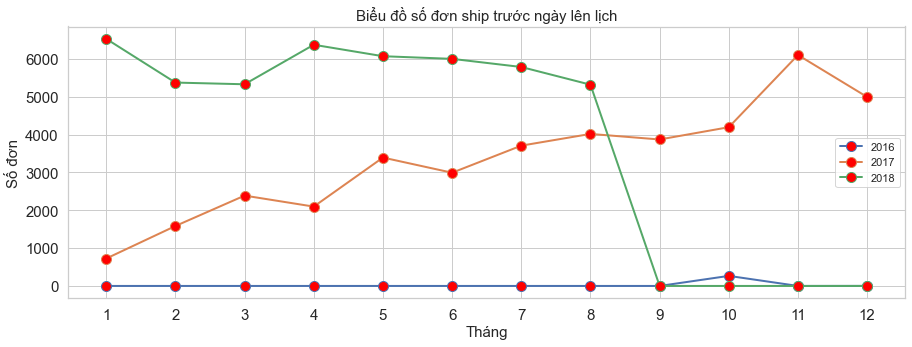

In [1331]:
xs = ship_truoc_timeseries.order_purchase_month
ys = ship_truoc_timeseries[[2016,2017,2018]]

plt.figure(figsize=(15,5))
plt.plot(xs, ys, linewidth=2, marker='o',markersize=10,markerfacecolor='red')
plt.xticks(xs,fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Số đơn',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Biểu đồ số đơn ship trước ngày lên lịch',fontsize=15)
plt.legend([2016,2017,2018])

# for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                     (x,y), # these are the coordinates to position the label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,10), # distance from text to points (x,y)
#                     ha='center') # horizontal alignment can be left, right or center

plt.show()

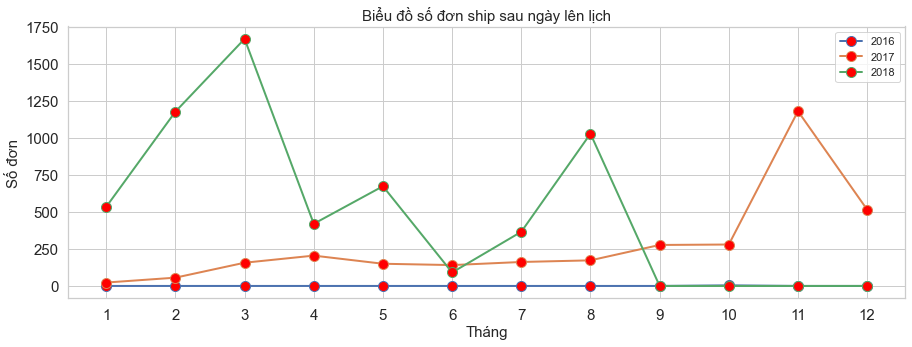

In [1332]:
xs = ship_sau_timeseries.order_purchase_month
ys = ship_sau_timeseries[[2016,2017,2018]]

plt.figure(figsize=(15,5))
plt.plot(xs, ys, linewidth=2, marker='o',markersize=10,markerfacecolor='red')
plt.xticks(xs,fontsize=15)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Số đơn',fontsize=15)
plt.yticks(fontsize=15)
plt.title('Biểu đồ số đơn ship sau ngày lên lịch',fontsize=15)
plt.legend([2016,2017,2018])

# for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                     (x,y), # these are the coordinates to position the label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,10), # distance from text to points (x,y)
#                     ha='center') # horizontal alignment can be left, right or center

plt.show()

In [1333]:
# Rate
rate_ship_type = pd.pivot_table(data=df1_temp,index='ship_type',columns='order_purchase_year',values='order_id',aggfunc='count',fill_value=0).reset_index()
rate_ship_type

order_purchase_year,ship_type,2016,2017,2018
0,Sau,4,3321,5963
1,Trước,267,40091,46815


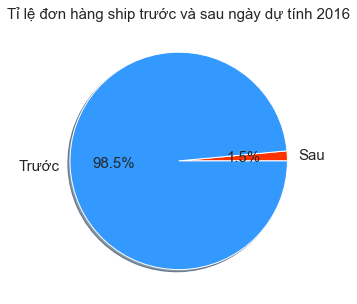

In [1334]:
plt.figure(figsize=(5,5))

values = rate_ship_type[2016]
colors = ['#ff3300','#3399ff']

plt.pie(values,labels=rate_ship_type.ship_type,colors=colors,autopct='%1.1f%%',textprops={'fontsize': 15},shadow=True)
plt.title('Tỉ lệ đơn hàng ship trước và sau ngày dự tính 2016',fontsize=15)
plt.show();

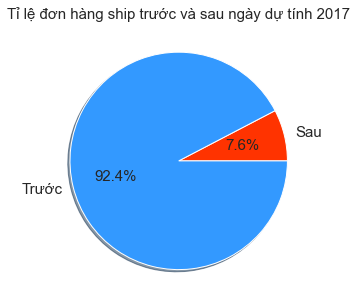

In [1335]:
plt.figure(figsize=(5,5))

values = rate_ship_type[2017]
colors = ['#ff3300','#3399ff']

plt.pie(values,labels=rate_ship_type.ship_type,colors=colors,autopct='%1.1f%%',textprops={'fontsize': 15},shadow=True)
plt.title('Tỉ lệ đơn hàng ship trước và sau ngày dự tính 2017',fontsize=15)
plt.show();

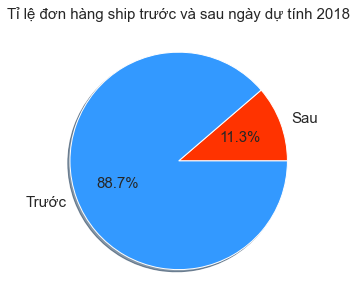

In [1336]:
plt.figure(figsize=(5,5))

values = rate_ship_type[2018]
colors = ['#ff3300','#3399ff']

plt.pie(values,labels=rate_ship_type.ship_type,colors=colors,autopct='%1.1f%%',textprops={'fontsize': 15},shadow=True)
plt.title('Tỉ lệ đơn hàng ship trước và sau ngày dự tính 2018',fontsize=15)
plt.show();

In [1337]:
ship_sau_data = df1_temp.loc[df1_temp.ship_type == 'Sau']
ship_sau_data.head()

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead_time,order_purchase_month,order_purchase_year,order_purchase_hour,lead_time_approved,lead_time_delivered_carrier,lead_time_approved_convert,lead_time_delivered_carrier_convert,type_approved,sub_estimate_real_ship,ship_type
8,0005a1a1728c9d785b8e2b08b904576c,157.60,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29,10.0,3,2018,18,0 days 23:54:48,7 days 06:02:21,23.913333,174.039167,Chậm,-1,Sau
11,00063b381e2406b52ad429470734ebd5,57.98,6a899e55865de6549a58d2c6845e5604,delivered,2018-07-27 17:21:27,2018-07-27 18:00:06,2018-07-30 14:52:00,2018-08-07 13:56:52,2018-08-07,11.0,7,2018,17,0 days 00:38:39,2 days 20:51:54,0.644167,68.865000,Chậm,-1,Sau
20,000e906b789b55f64edcb1f84030f90d,33.84,6a3b2fc9f270df258605e22bef19fd88,delivered,2017-11-21 18:54:23,2017-11-21 19:09:02,2017-11-22 20:46:54,2017-12-09 17:27:23,2017-12-07,18.0,11,2017,18,0 days 00:14:39,1 days 01:37:52,0.244167,25.631111,Trung bình,-3,Sau
37,0017afd5076e074a48f1f1a4c7bac9c5,853.39,8085a9af46f619bc25966f151a362b0d,delivered,2017-04-06 22:16:10,2017-04-06 22:25:19,2017-04-17 13:54:37,2017-05-23 08:32:07,2017-05-19,46.0,4,2017,22,0 days 00:09:09,10 days 15:29:18,0.152500,255.488333,Nhanh,-5,Sau
43,001c85b5f68d2be0cb0797afc9e8ce9a,112.71,48ed31e735f1c420ed6ca3637b7c744d,delivered,2017-11-24 19:19:18,2017-11-24 22:38:47,2017-11-27 12:42:15,2017-12-22 18:37:40,2017-12-14,28.0,11,2017,19,0 days 03:19:29,2 days 14:03:28,3.324722,62.057778,Chậm,-9,Sau


In [1338]:
order_id_list_sau = ship_sau_data['order_id']

In [1339]:
ship_sau_data_rev1 = ship_sau_data.merge(order_item_df,on='order_id',how='right')

In [1340]:
ship_sau_data_rev1 = ship_sau_data_rev1.loc[ship_sau_data_rev1['order_id'].isin(order_id_list_sau)]

In [1341]:
ship_sau_data_rev2 = ship_sau_data_rev1.merge(products_df,on='product_id',how='left')

In [1342]:
ship_sau_data_rev2 = ship_sau_data_rev2.merge(product_category_name_trans_df,on='product_category_name',how='left')

Thống kê xem mặt hàng nào nhiều nhất trong các đơn bị hủy 

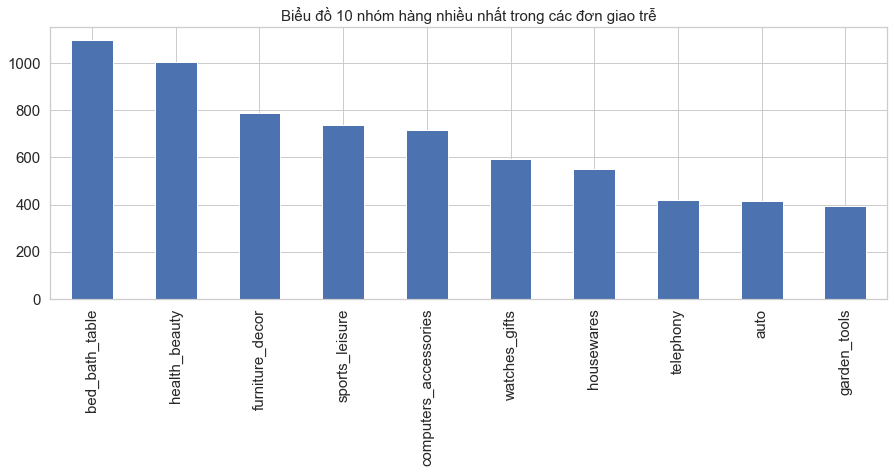

bed_bath_table           1100
health_beauty            1004
furniture_decor           790
sports_leisure            736
computers_accessories     717
watches_gifts             594
housewares                550
telephony                 418
auto                      414
garden_tools              392
Name: product_category_name_english, dtype: int64

In [1343]:
ship_sau_data_rev2.product_category_name_english.value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Biểu đồ 10 nhóm hàng nhiều nhất trong các đơn giao trễ',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show();

ship_sau_data_rev2.product_category_name_english.value_counts().sort_values(ascending=False).head(10)

In [1344]:
ship_sau_data_rev2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10322 entries, 0 to 10321
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   order_id                             10322 non-null  object         
 1   payment_value                        10322 non-null  float64        
 2   customer_id                          10322 non-null  object         
 3   order_status                         10322 non-null  object         
 4   order_purchase_timestamp             10322 non-null  datetime64[ns] 
 5   order_approved_at                    10322 non-null  datetime64[ns] 
 6   order_delivered_carrier_date         10321 non-null  datetime64[ns] 
 7   order_delivered_customer_date        10322 non-null  datetime64[ns] 
 8   order_estimated_delivery_date        10322 non-null  datetime64[ns] 
 9   lead_time                            10322 non-null  float64        
 10

In [1345]:
ship_sau_data_rev2.isnull().sum()

order_id                                 0
payment_value                            0
customer_id                              0
order_status                             0
order_purchase_timestamp                 0
order_approved_at                        0
order_delivered_carrier_date             1
order_delivered_customer_date            0
order_estimated_delivery_date            0
lead_time                                0
order_purchase_month                     0
order_purchase_year                      0
order_purchase_hour                      0
lead_time_approved                       0
lead_time_delivered_carrier              1
lead_time_approved_convert               0
lead_time_delivered_carrier_convert      1
type_approved                            0
sub_estimate_real_ship                   0
ship_type                                0
order_item_id                            0
product_id                               0
seller_id                                0
price      

In [1346]:
ship_sau_data_rev2.dropna(inplace=True)

In [1347]:
ship_sau_data_rev2['the_tich'] = ship_sau_data_rev2['product_length_cm'] * ship_sau_data_rev2['product_height_cm'] * ship_sau_data_rev2['product_width_cm']
ship_sau_data_rev2['the_tich']

0         5760.0
1         2816.0
2          816.0
3        14168.0
4        20944.0
          ...   
10317     6000.0
10318     6000.0
10319    15750.0
10320      816.0
10321    10560.0
Name: the_tich, Length: 10154, dtype: float64

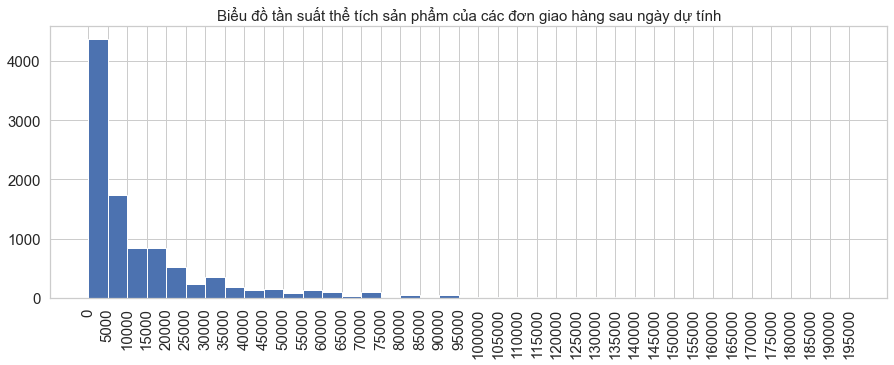

In [1348]:
plt.figure(figsize=(15,5))
plt.hist(ship_sau_data_rev2['the_tich'],bins=np.arange(0,200000,5000))
plt.title('Biểu đồ tần suất thể tích sản phẩm của các đơn giao hàng sau ngày dự tính',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(0,200000,5000),fontsize=15,rotation=90)
plt.show()

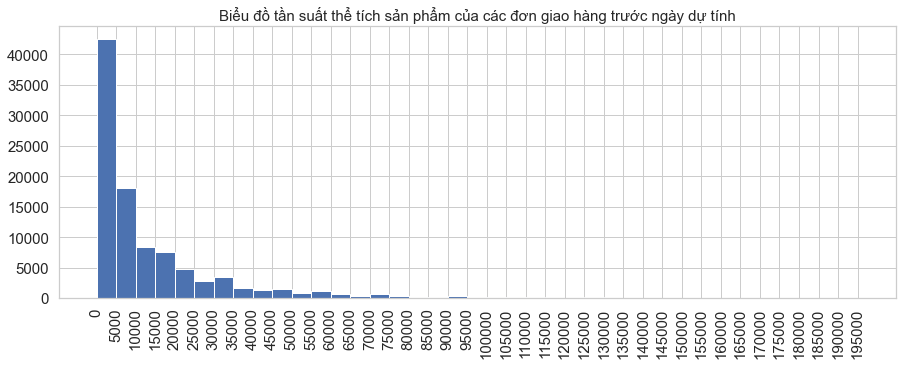

In [1349]:
# vẽ thêm các đơn giao hàng sớm để tiện so sánh
ship_truoc_data = df1_temp.loc[df1_temp['ship_type'] == 'Trước']
ship_truoc_order_list = ship_truoc_data.order_id
ship_truoc_data_rev1 = ship_truoc_data.merge(order_item_df,on='order_id',how='right')
ship_truoc_data_rev2 = ship_truoc_data_rev1.loc[ship_truoc_data_rev1['order_id'].isin(ship_truoc_order_list)] 
ship_truoc_data_rev3 = ship_truoc_data_rev2.merge(products_df,on='product_id',how='left')
ship_truoc_data_rev4 = ship_truoc_data_rev3.dropna()
ship_truoc_data_rev4['the_tich'] = ship_truoc_data_rev4['product_length_cm'] * ship_truoc_data_rev4['product_height_cm'] * ship_truoc_data_rev4['product_width_cm']

plt.figure(figsize=(15,5))
plt.hist(ship_truoc_data_rev4['the_tich'],bins=np.arange(0,200000,5000))
plt.title('Biểu đồ tần suất thể tích sản phẩm của các đơn giao hàng trước ngày dự tính',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(0,200000,5000),fontsize=15,rotation=90)
plt.show()

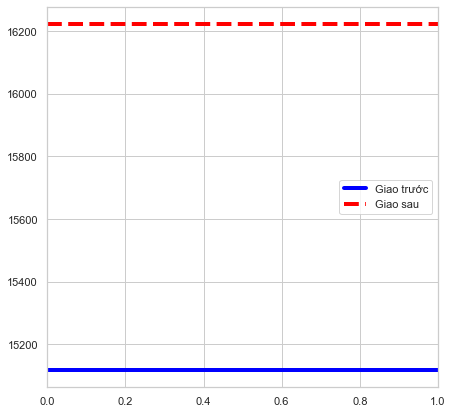

In [1350]:
plt.figure(figsize=(7,7))
plt.axhline(np.mean(ship_truoc_data_rev4['the_tich']),color='blue',label='Giao trước',linewidth=4)
plt.axhline(np.mean(ship_sau_data_rev2['the_tich']),color='red',linestyle='--',label='Giao sau',linewidth=4)
plt.legend()
plt.show()

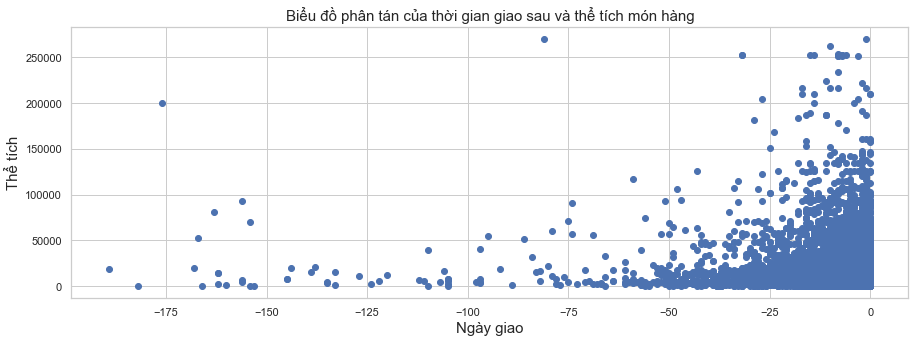

In [1351]:
plt.figure(figsize=(15,5))
plt.scatter(ship_sau_data_rev2.sub_estimate_real_ship,ship_sau_data_rev2.the_tich)
plt.title('Biểu đồ phân tán của thời gian giao sau và thể tích món hàng',fontsize=15)
plt.xlabel('Ngày giao',fontsize=15)
plt.ylabel('Thể tích',fontsize=15)
plt.show();

In [1352]:
ship_sau_data_rev2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10154 entries, 0 to 10321
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   order_id                             10154 non-null  object         
 1   payment_value                        10154 non-null  float64        
 2   customer_id                          10154 non-null  object         
 3   order_status                         10154 non-null  object         
 4   order_purchase_timestamp             10154 non-null  datetime64[ns] 
 5   order_approved_at                    10154 non-null  datetime64[ns] 
 6   order_delivered_carrier_date         10154 non-null  datetime64[ns] 
 7   order_delivered_customer_date        10154 non-null  datetime64[ns] 
 8   order_estimated_delivery_date        10154 non-null  datetime64[ns] 
 9   lead_time                            10154 non-null  float64        
 10

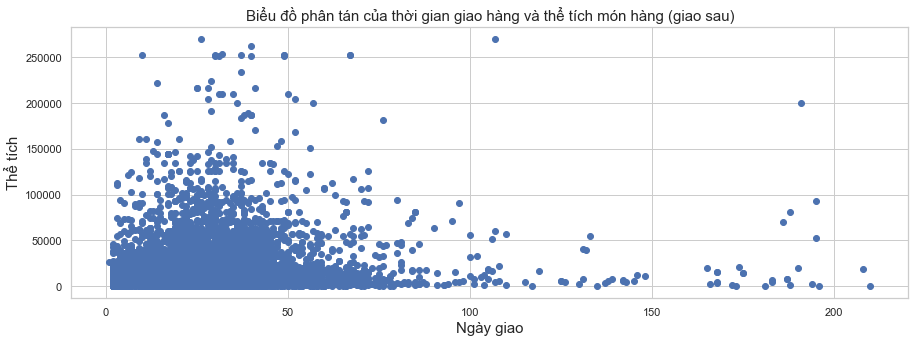

In [1353]:
plt.figure(figsize=(15,5))
plt.scatter(ship_sau_data_rev2.lead_time,ship_sau_data_rev2.the_tich)
plt.title('Biểu đồ phân tán của thời gian giao hàng và thể tích món hàng (giao sau)',fontsize=15)
plt.xlabel('Ngày giao',fontsize=15)
plt.ylabel('Thể tích',fontsize=15)
plt.show();

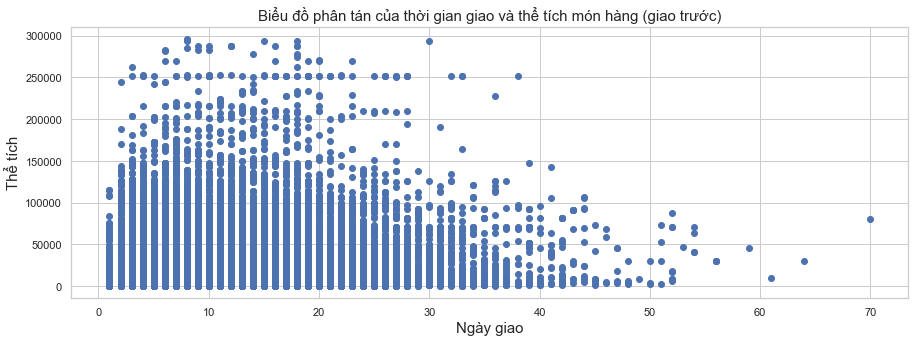

In [1354]:
plt.figure(figsize=(15,5))
plt.scatter(ship_truoc_data_rev4.lead_time,ship_truoc_data_rev4.the_tich)
plt.title('Biểu đồ phân tán của thời gian giao và thể tích món hàng (giao trước)',fontsize=15)
plt.xlabel('Ngày giao',fontsize=15)
plt.ylabel('Thể tích',fontsize=15)
plt.show();

Ta cần làm gì để thúc đẩy các bang có doanh thu lớn dựa vào tập dữ liệu đang có ?

+ Dịch vụ tốt: Thơi gian nhận hàng nhanh
+ Giá sản phẩm tốt

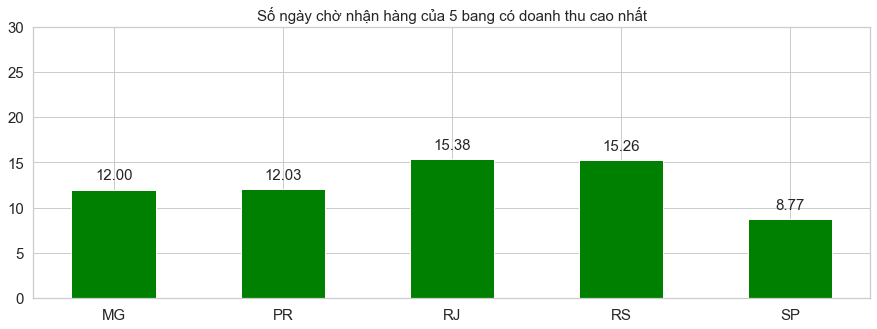

In [1355]:
index_labels = doanhthu_khuvuc.head()['customer_state']
ks_top5_bang =  location_order.loc[location_order['customer_state'].isin(index_labels)]
ks_top5_bang['customer_state'].unique()
temp_table = pd.pivot_table(data=ks_top5_bang,index='customer_state',
                values='lead_time',aggfunc=np.mean,fill_value=0).reset_index()

xs = temp_table['customer_state']
ys = temp_table['lead_time']

plt.figure(figsize=(15,5))

plt.bar(xs, ys,width=0.5,color='green')
plt.title('Số ngày chờ nhận hàng của 5 bang có doanh thu cao nhất',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,35,5),fontsize=15)

# high = max(ys)
# low = min(ys)
# plt.ylim(0,high + 0.5*(high-low))

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show();

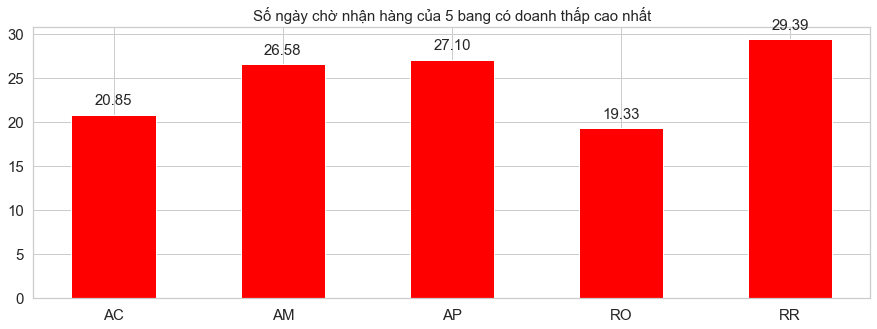

In [1356]:
index_labels = doanhthu_khuvuc.tail()['customer_state']
ks_tail5_bang =  location_order.loc[location_order['customer_state'].isin(index_labels)]
ks_tail5_bang['customer_state'].unique()
temp_table =  pd.pivot_table(data=ks_tail5_bang,index='customer_state',
                values='lead_time',aggfunc=np.mean,fill_value=0).reset_index()

xs = temp_table['customer_state']
ys = temp_table['lead_time']

plt.figure(figsize=(15,5))

plt.bar(xs, ys,width=0.5,color='red')
plt.title('Số ngày chờ nhận hàng của 5 bang có doanh thấp cao nhất',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(np.arange(0,35,5),fontsize=15)

# high = max(ys)
# low = min(ys)
# plt.ylim(0,high + 0.5*(high-low))

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show();

#### Kiểm tra leadtime

In [1361]:
df1_rev = df1.merge(order_reviews_df,on='order_id',how='left')
df1_rev = df1.loc[df1['order_id'].isin(orders_list)]

In [1365]:
df1_temp_review = df1_temp.merge(order_reviews_df,on='order_id',how='left')

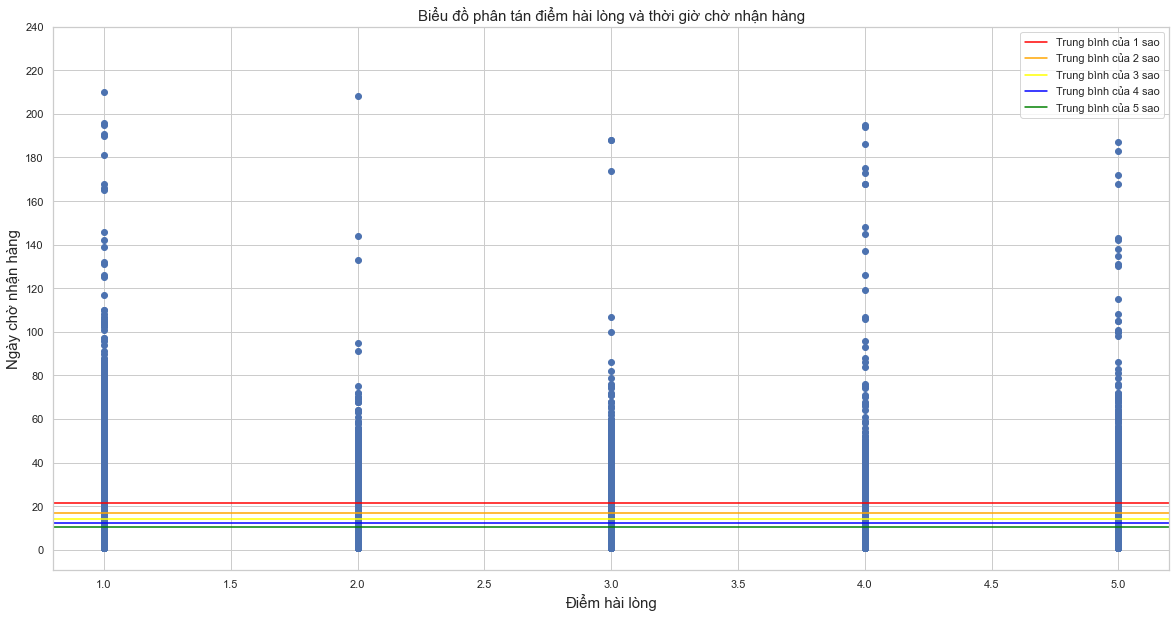

In [1388]:
plt.figure(figsize=(20,10))

plt.scatter(df1_temp_review.review_score,df1_temp_review.lead_time)
plt.title('Biểu đồ phân tán điểm hài lòng và thời giờ chờ nhận hàng',fontsize=15)
plt.axhline(df1_temp_review.groupby('review_score')['lead_time'].mean().iloc[0],label='Trung bình của 1 sao',color='red')
plt.axhline(df1_temp_review.groupby('review_score')['lead_time'].mean().iloc[1],label='Trung bình của 2 sao',color='orange')
plt.axhline(df1_temp_review.groupby('review_score')['lead_time'].mean().iloc[2],label='Trung bình của 3 sao',color='yellow')
plt.axhline(df1_temp_review.groupby('review_score')['lead_time'].mean().iloc[3],label='Trung bình của 4 sao',color='blue')
plt.axhline(df1_temp_review.groupby('review_score')['lead_time'].mean().iloc[4],label='Trung bình của 5 sao',color='green')
plt.xlabel('Điểm hài lòng',fontsize=15)
plt.ylabel('Ngày chờ nhận hàng',fontsize=15)
plt.legend()

plt.yticks(np.arange(0,250,20))
plt.show()

In [1382]:
df1_temp_review.groupby('review_score')['lead_time'].mean()

review_score
1    21.275926
2    16.702937
3    14.224265
4    12.271834
5    10.644535
Name: lead_time, dtype: float64

In [1363]:
df1_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99277 entries, 0 to 99439
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   order_id                             99277 non-null  object         
 1   payment_value                        99277 non-null  float64        
 2   customer_id                          99277 non-null  object         
 3   order_status                         99277 non-null  object         
 4   order_purchase_timestamp             99277 non-null  datetime64[ns] 
 5   order_approved_at                    99277 non-null  datetime64[ns] 
 6   order_delivered_carrier_date         97642 non-null  datetime64[ns] 
 7   order_delivered_customer_date        96461 non-null  datetime64[ns] 
 8   order_estimated_delivery_date        99277 non-null  datetime64[ns] 
 9   lead_time                            96461 non-null  float64        
 10

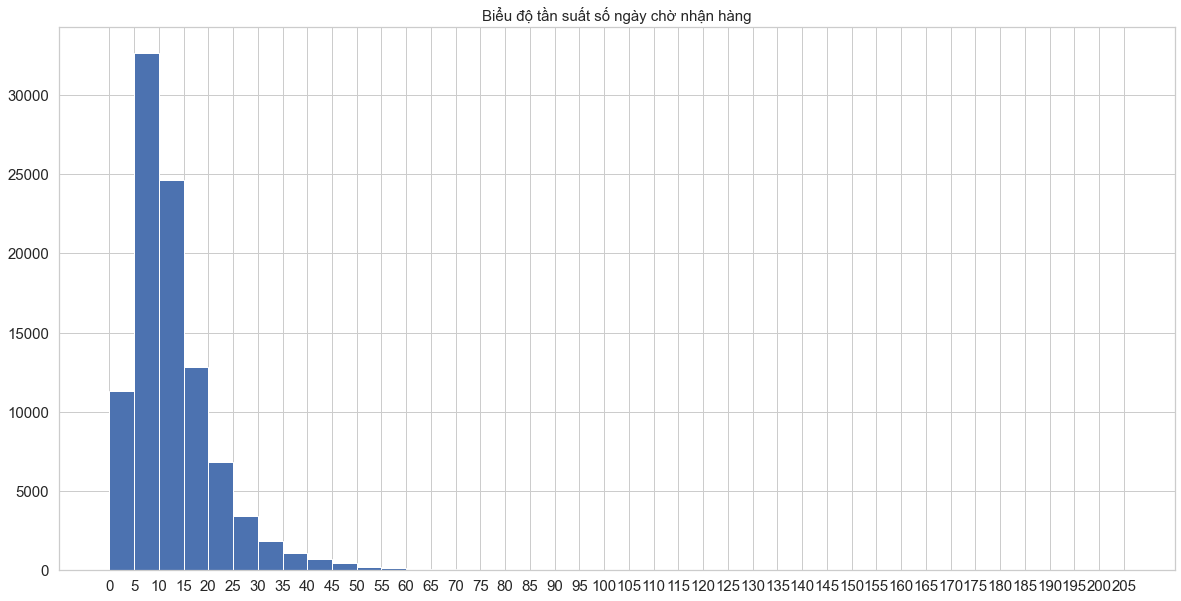

In [1391]:
plt.figure(figsize=(20,10))
xs = df1.lead_time.values
plt.hist(xs,bins=np.arange(0,max(xs),5))
plt.xticks(np.arange(0,max(xs),5),fontsize=15)
plt.yticks(fontsize=15)
plt.title('Biểu độ tần suất số ngày chờ nhận hàng',fontsize=15)
plt.show()

=> Số ngày lead_time phần lớn là từ 10 đến 20 ngày thì đơn hàng đến tay người mua

### Câu 2: Mức độ hài lòng của khách hàng

In [ ]:
df2 = df1.copy()

In [ ]:
df2 = df2.merge(order_reviews_df,on='order_id',how='left')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99277 entries, 0 to 99276
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   order_id                             99277 non-null  object         
 1   payment_value                        99277 non-null  float64        
 2   customer_id                          99277 non-null  object         
 3   order_status                         99277 non-null  object         
 4   order_purchase_timestamp             99277 non-null  datetime64[ns] 
 5   order_approved_at                    99277 non-null  datetime64[ns] 
 6   order_delivered_carrier_date         97642 non-null  datetime64[ns] 
 7   order_delivered_customer_date        96461 non-null  datetime64[ns] 
 8   order_estimated_delivery_date        99277 non-null  datetime64[ns] 
 9   lead_time                            96461 non-null  float64        
 10

In [ ]:
df2.isnull().sum()

order_id                                   0
payment_value                              0
customer_id                                0
order_status                               0
order_purchase_timestamp                   0
order_approved_at                          0
order_delivered_carrier_date            1635
order_delivered_customer_date           2816
order_estimated_delivery_date              0
lead_time                               2816
order_purchase_month                       0
order_purchase_year                        0
order_purchase_hour                        0
lead_time_approved                         0
lead_time_delivered_carrier             1635
lead_time_approved_convert                 0
lead_time_delivered_carrier_convert     1635
type_approved                              0
review_id                                  0
review_score                               0
review_comment_title                   87630
review_comment_message                 57827
review_cre

In [ ]:
diemhailong_table = df2[['order_id','payment_value','customer_id','order_purchase_timestamp','lead_time','review_score','review_creation_date']]

In [ ]:
diemhailong_table.describe()

,payment_value,lead_time,review_score
count,99277.000000,96461.000000,99277.000000
mean,160.874709,12.558154,4.074035
std,221.459669,9.546250,1.357342
min,9.590000,0.533414,1.000000
25%,62.000000,6.765856,4.000000
50%,105.280000,10.216308,5.000000
75%,176.880000,15.720255,5.000000
max,13664.080000,209.628611,5.000000


Điểm khách hàng hài lòng phân bố như thế nào?

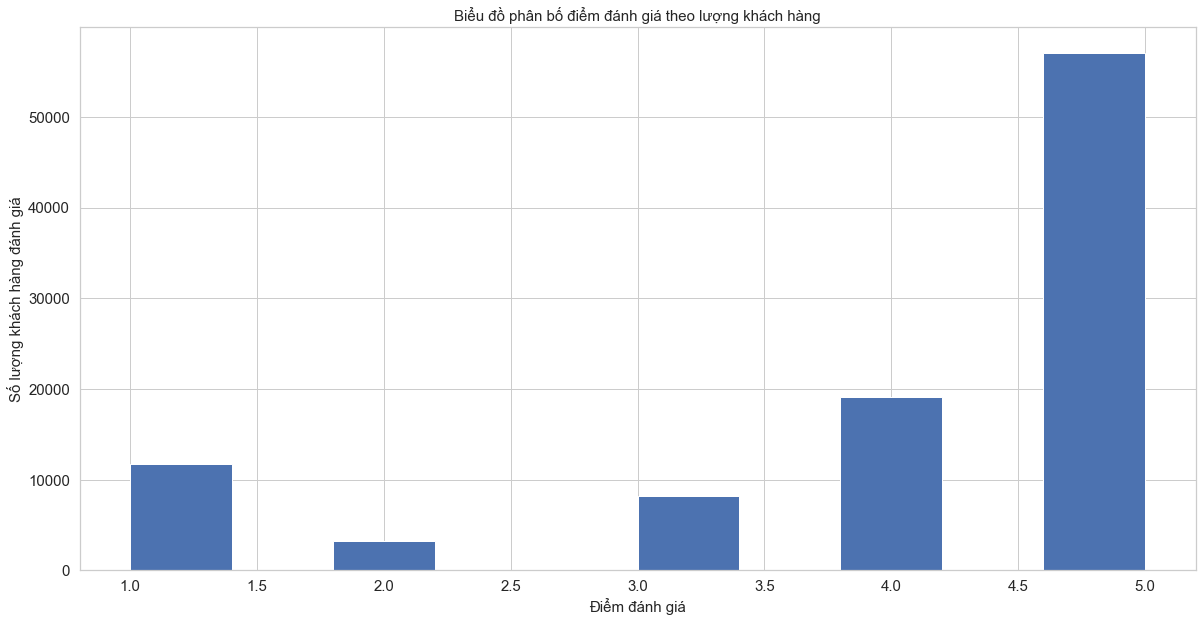

,review_score,order_id
0,1,11707
1,2,3200
2,3,8207
3,4,19085
4,5,57078


In [ ]:
plt.figure(figsize=(20,10))

values = df2['review_score'].values
plt.hist(values)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Điểm đánh giá',fontsize=15)
plt.ylabel('Số lượng khách hàng đánh giá',fontsize=15)
plt.title('Biểu đồ phân bố điểm đánh giá theo lượng khách hàng',fontsize=15)
plt.show();

temp_table = pd.pivot_table(data=df2,index='review_score',values='order_id',aggfunc='count').reset_index()
temp_table

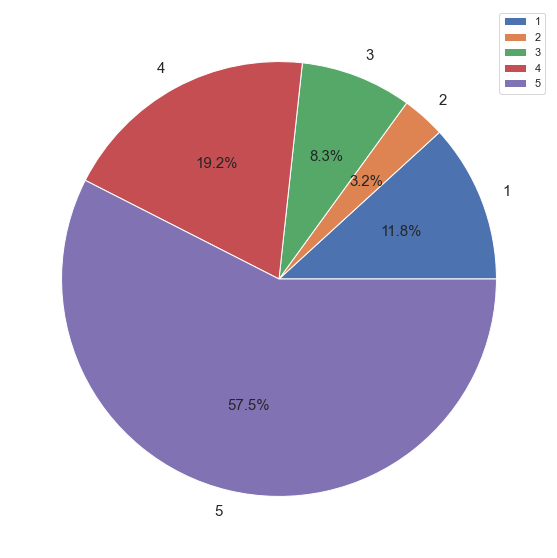

In [ ]:
plt.figure(figsize=(10,10))
values = round(temp_table.order_id/sum(temp_table.order_id.values)*100,2)
labels = temp_table['review_score'].tolist()


plt.pie(values,labels=labels,autopct='%1.1f%%',textprops={'fontsize':15})
plt.legend()
plt.show();

=> Phần lớn là khách hàng đánh giá 5 sao khá nhiều => Dịch vụ cũng như sản phẩm của Cty X là rất tốt => Khách hàng hài lòng => Đánh giá cao

Thời gian chờ nhận hàng có ảnh hưởng đến tâm lý đánh giá khách hàng ko?

In [ ]:
tgcho_table = pd.pivot_table(data=df2,index='review_score',values='lead_time',aggfunc=np.mean,fill_value=0).reset_index()
tgcho_table

,review_score,lead_time
0,1,21.317472
1,2,16.745003
2,3,14.262686
3,4,12.313874
4,5,10.685704


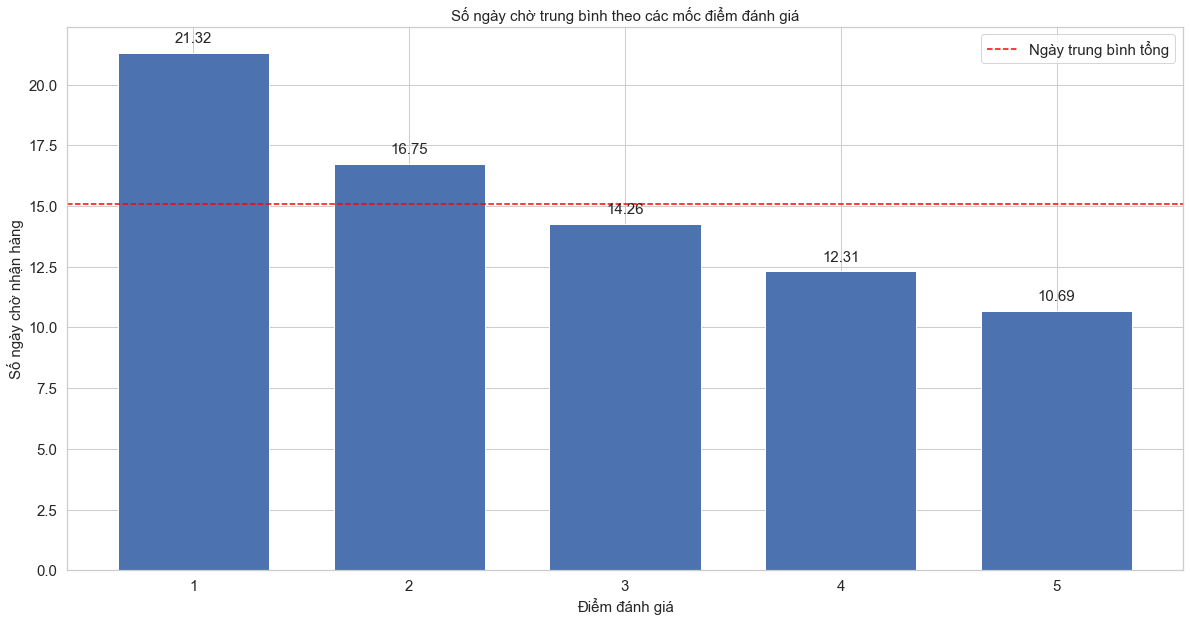

In [ ]:
plt.figure(figsize=(20,10))

xs = tgcho_table.review_score
ys = tgcho_table.lead_time

plt.bar(xs, ys,width=0.7)
plt.axhline(np.mean(ys),color='red',linestyle='--',label='Ngày trung bình tổng')
plt.xlabel('Điểm đánh giá',fontsize=15)
plt.ylabel('Số ngày chờ nhận hàng',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Số ngày chờ trung bình theo các mốc điểm đánh giá',fontsize=15)
plt.legend(fontsize=15)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show();

=>> Đơn hàng có đến tay người dùng càng nhành thì người dùng có xu hướng đánh giá đơn hàng đó càng tốt

Đối với những đơn hàng chỉ có một sản phẩm thì điểm đánh giá sẽ như thế nào theo từng nhóm hàng?

Ta xét các đơn order chỉ có 1 nhóm hàng trước.

In [ ]:
# Tạo 1 bảng dữ liệu merge giữa bảng order_item và bảng review_order
df3 = order_item_df.merge(order_reviews_df,on=['order_id'],how='left')
df3.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [ ]:
soluongorder_table = pd.pivot_table(data=df3,index='order_id',values='order_item_id',aggfunc='count',fill_value=0).reset_index()
soluongorder_table.rename(columns={'order_item_id' : 'items_quantity'},inplace=True)
soluongorder_table.head()

,order_id,items_quantity
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [ ]:
soluongorder_table = soluongorder_table.loc[soluongorder_table['items_quantity'] == 1]
soluongorder_table = soluongorder_table.merge(order_item_df,on=['order_id'],how='left')
soluongorder_table.head()

,order_id,items_quantity,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [ ]:
soluongorder_table = soluongorder_table.merge(order_reviews_df,on=['order_id'],how='left')
soluongorder_table.head()

,order_id,items_quantity,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
soluongorder_table = soluongorder_table.merge(products_df,on=['product_id'],how='left')
soluongorder_table = soluongorder_table.merge(product_category_name_trans_df,on=['product_category_name'],how='left')
soluongorder_table.head()

,order_id,items_quantity,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,review_comment_title,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,...,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,...,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,...,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,...,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [ ]:
soluongorder_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88863 entries, 0 to 88862
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       88863 non-null  object        
 1   items_quantity                 88863 non-null  int64         
 2   order_item_id                  88863 non-null  int64         
 3   product_id                     88863 non-null  object        
 4   seller_id                      88863 non-null  object        
 5   price                          88863 non-null  float64       
 6   freight_value                  88863 non-null  float64       
 7   review_id                      88863 non-null  object        
 8   review_score                   88863 non-null  int64         
 9   review_comment_title           10218 non-null  object        
 10  review_comment_message         35975 non-null  object        
 11  review_creation

Nhóm đơn hàng nào là giao hàng lâu nhất?

In [ ]:
diemdanhgia_1sp = pd.pivot_table(data=soluongorder_table,index='product_category_name_english',values='review_score',aggfunc=np.mean,fill_value=0).reset_index()
diemdanhgia_1sp = diemdanhgia_1sp.sort_values(by='review_score',ascending=False)
diemdanhgia_1sp.head(10)

,product_category_name_english,review_score
52,la_cuisine,4.900000
11,cds_dvds_musicals,4.700000
35,flowers,4.521739
8,books_general_interest,4.476891
21,costruction_tools_garden,4.426667
10,books_technical,4.425703
32,fashion_sport,4.416667
55,music,4.388889
22,costruction_tools_tools,4.384615
37,food_drink,4.383420


In [ ]:
diemdanhgia_1sp.tail(10)

,product_category_name_english,review_score
34,fixed_telephony,3.979058
47,home_confort,3.978261
33,fashion_underwear_beach,3.885965
19,construction_tools_safety,3.857143
4,audio,3.833837
41,furniture_mattress_and_upholstery,3.815789
27,fashio_female_clothing,3.794118
30,fashion_male_clothing,3.757895
57,office_furniture,3.740310
61,security_and_services,2.500000


Các đơn hàng theo nhóm hàng khác nhau thì chi phí ship có thay đổi không, và số đơn hàng càng cao

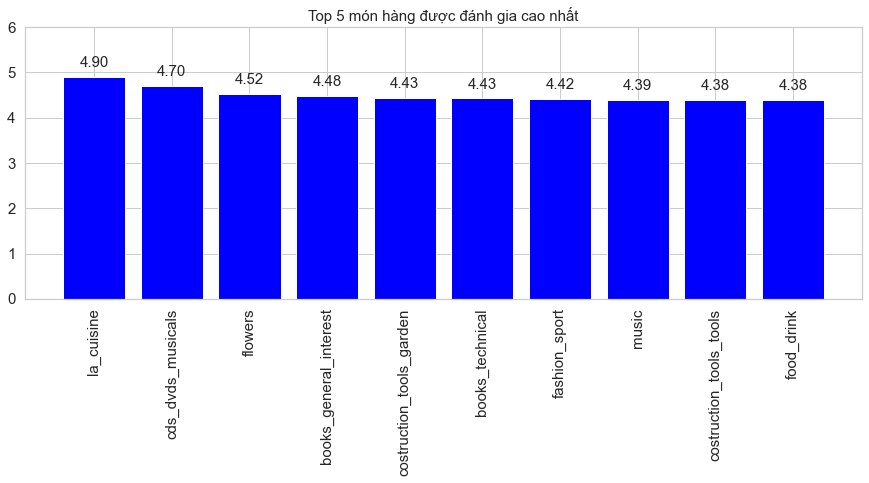

In [ ]:
# Vẽ đồ thị các 10 mặt hàng dc đánh giá cao nhất và thấp nhất

plt.figure(figsize=(15,5))
xs = diemdanhgia_1sp['product_category_name_english'].head(10)
ys = diemdanhgia_1sp['review_score'].head(10)
plt.bar(xs,ys,color='blue')
plt.yticks(np.arange(0,7,1),fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Top 5 món hàng được đánh gia cao nhất',fontsize=15)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show();



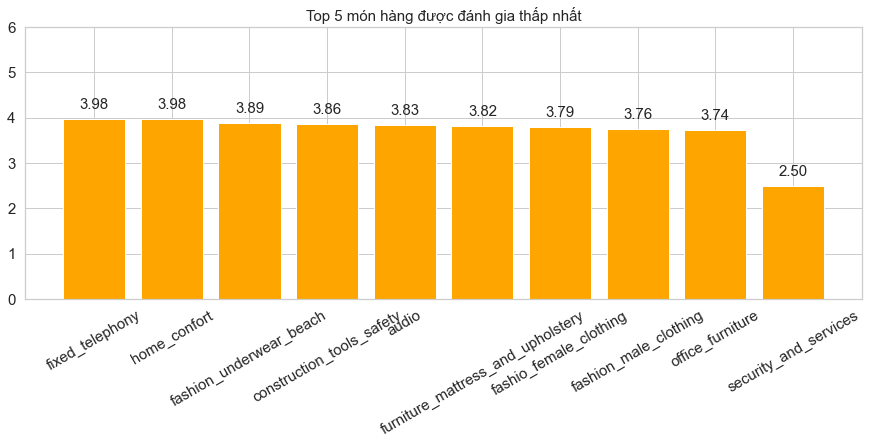

In [ ]:
# Vẽ đồ thị các 10 mặt hàng dc đánh giá cao nhất và thấp nhất
plt.figure(figsize=(15,5))
xs = diemdanhgia_1sp['product_category_name_english'].tail(10)
ys = diemdanhgia_1sp['review_score'].tail(10)
plt.bar(xs,ys,color='orange')
plt.yticks(np.arange(0,7,1),fontsize=15)
plt.xticks(fontsize=15,rotation=30)
plt.title('Top 5 món hàng được đánh gia thấp nhất',fontsize=15)

for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show();



In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


KHẢO SÁT YẾU TỐ VOUCHER ĐỐI VỚI SỰ HÀI LÒNG CỦA KHÁCH HÀNG

In [1397]:
df1_temp_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 96460
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   order_id                             96461 non-null  object         
 1   payment_value                        96461 non-null  float64        
 2   customer_id                          96461 non-null  object         
 3   order_status                         96461 non-null  object         
 4   order_purchase_timestamp             96461 non-null  datetime64[ns] 
 5   order_approved_at                    96461 non-null  datetime64[ns] 
 6   order_delivered_carrier_date         96460 non-null  datetime64[ns] 
 7   order_delivered_customer_date        96461 non-null  datetime64[ns] 
 8   order_estimated_delivery_date        96461 non-null  datetime64[ns] 
 9   lead_time                            96461 non-null  float64        
 10

In [1402]:
voucher_order = order_payments_df[['order_id','payment_type']]
df1_temp_review_rev = df1_temp_review.merge(voucher_order,on='order_id',how='left')

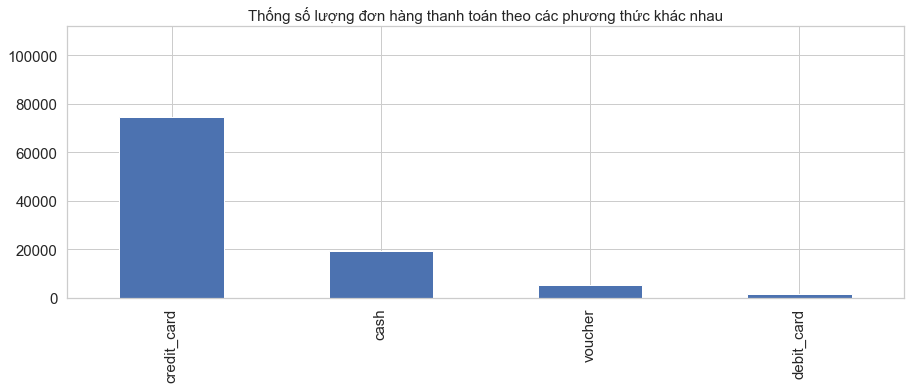

credit_card    74585
cash           19177
voucher         5493
debit_card      1485
Name: payment_type, dtype: int64

In [1429]:
df1_temp_review_rev['payment_type'].value_counts().plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,max(df1_temp_review_rev['payment_type'].value_counts().values)*1.5)
plt.title('Thống số lượng đơn hàng thanh toán theo các phương thức khác nhau',fontsize=15)

plt.show()
a = df1_temp_review_rev['payment_type'].value_counts()
a

In [1430]:
a = pd.DataFrame(a)
a.columns=['count']
a['percent'] = a['count']/sum(a['count'])*100
a

,count,percent
credit_card,74585,74.037125
cash,19177,19.036133
voucher,5493,5.452650
debit_card,1485,1.474092


In [1433]:
df1_temp_review_rev['date'] = df1_temp_review_rev['order_purchase_timestamp'].dt.strftime('%Y-%m')
df1_temp_review_rev['date'] = pd.to_datetime(df1_temp_review_rev['date'])

In [1440]:
payment_type_timeseries = pd.pivot_table(df1_temp_review_rev,index='date',values='order_id',aggfunc='count',fill_value=0,columns='payment_type')

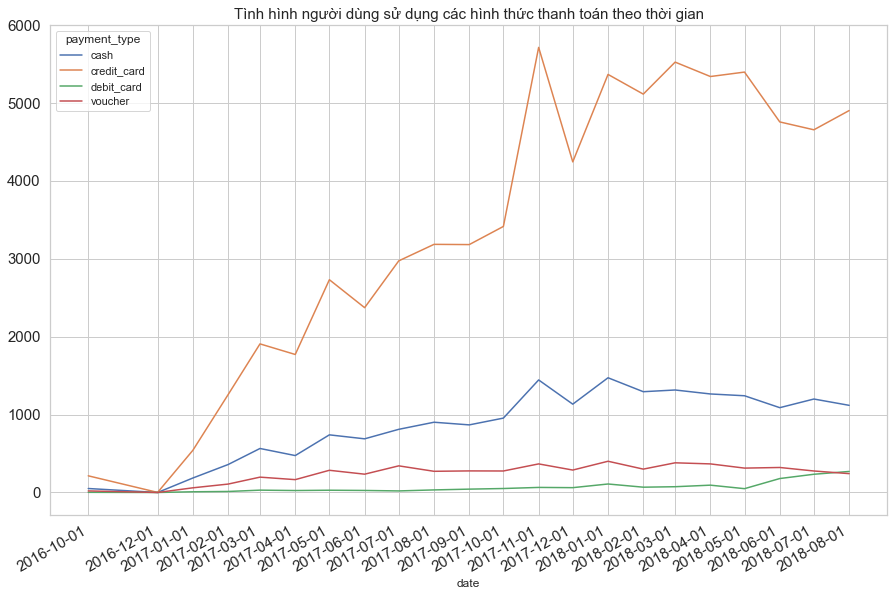

In [1451]:
payment_type_timeseries.plot(figsize=(15,10))
plt.xticks(payment_type_timeseries.index,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Tình hình người dùng sử dụng các hình thức thanh toán theo thời gian',fontsize=15)
plt.show();


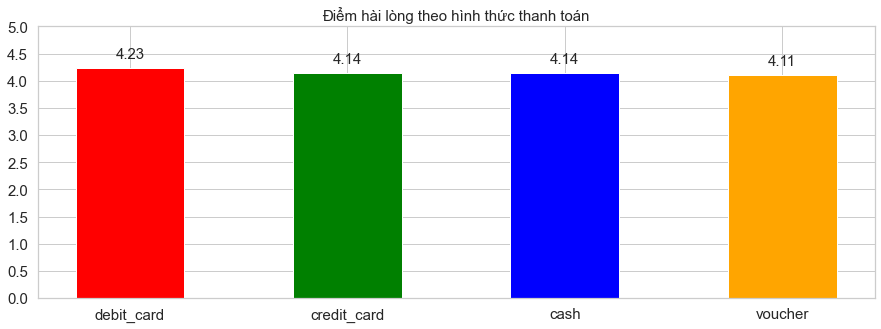

In [1466]:
review_score_payment_type = pd.pivot_table(df1_temp_review_rev,index='payment_type',values='review_score',aggfunc=np.mean,fill_value=0).reset_index().sort_values(by='review_score',ascending=False)

xs = review_score_payment_type.payment_type
ys = review_score_payment_type.review_score

plt.figure(figsize=(15,5))
colors = ['red','green','blue','orange']
plt.bar(xs,ys,width=0.5,color=colors)

plt.xticks(fontsize=15)
plt.yticks(np.arange(0,5.2,0.5),fontsize=15)
plt.title('Điểm hài lòng theo hình thức thanh toán',fontsize=15)
for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center',fontsize=15) # horizontal alignment can be left, right or center

plt.show()
